Our project focuses on comparing the 2023 and 2024 food drive dataset. As a result we uploaded a previously cleaned version of the 2023 dataset and carried out a few more data cleaning to create visualizations for both 2023 and 2024 datasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
data_2024 = pd.read_csv('Food Drive Data Collection 2024(1-448).csv', encoding='latin1')

In [ ]:
data_2023 = pd.read_csv('cleaned_food_drive_data 2023.csv', encoding='latin1')

In [15]:
print(data_2023.head())

                  Date              Location              Stake  \
0  2023-09-23 10:36:10    Londonderry Chapel  Bonnie Doon Stake   
1  2023-09-23 10:36:52  Gateway Stake Centre      Gateway Stake   
2  2023-09-23 10:40:22  Gateway Stake Centre      Gateway Stake   
3  2023-09-23 10:41:08  Gateway Stake Centre      Gateway Stake   
4  2023-09-23 10:44:10    Londonderry Chapel  Bonnie Doon Stake   

   # of Adult Volunteers  # of Youth Volunteers  Donation Bags Collected  \
0                      1                      3                       14   
1                      3                      1                       18   
2                      2                      0                       20   
3                      2                      0                       20   
4                      1                      0                        2   

   Time to Complete (min)  Completed More Than One Route  \
0                    25.0                              0   
1                   

In [16]:
print(data_2024.head())

   ID        Start time   Completion time      Email  Name  \
0  23  9-25-24 16:56:05  9-25-24 16:57:23  anonymous   NaN   
1  24  9-27-24 14:43:27  9-27-24 14:49:42  anonymous   NaN   
2  25  9-28-24 10:01:37  9-28-24 10:05:20  anonymous   NaN   
3  26  9-28-24 10:31:19  9-28-24 10:34:00  anonymous   NaN   
4  27  9-28-24 10:33:28  9-28-24 10:36:55  anonymous   NaN   

  How did you receive the form? Email address          Drop Off Location  \
0                     In person            NaN           Bearspaw Chapel   
1                     via Email            NaN           Bearspaw Chapel   
2                     In person            NaN        Londonberry Chapel   
3                     In person            NaN     Gateway Stake Centre    
4                     In person            NaN  Bonnie Doon Stake Centre   

  Other Drop-off Locations              Stake  ...  \
0                      NaN    Riverbend Stake  ...   
1                      NaN      Gateway Stake  ...   
2       

In [ ]:
print(data_2024.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 31 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ID                                                     448 non-null    int64  
 1   Start time                                             448 non-null    object 
 2   Completion time                                        448 non-null    object 
 3   Email                                                  448 non-null    object 
 4   Name                                                   0 non-null      float64
 5   How did you receive the form?                          448 non-null    object 
 6   Email address                                          192 non-null    object 
 7   Drop Off Location                                      448 non-null    object 
 8   Other Drop-off Locations                          

Dropping irrelvant columns

In [ ]:
# Strip whitespace and standardize column names
data_2024.columns = data_2024.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
data_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 31 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   id                                                    448 non-null    int64  
 1   start_time                                            448 non-null    object 
 2   completion_time                                       448 non-null    object 
 3   email                                                 448 non-null    object 
 4   name                                                  0 non-null      float64
 5   how_did_you_receive_the_form?                         448 non-null    object 
 6   email_address                                         192 non-null    object 
 7   drop_off_location                                     448 non-null    object 
 8   other_drop-off_locations                              2 non-

In [ ]:
#dropping columns with standardized names
data_2024 = data_2024.drop(columns=['id', 'email', 'name', 'other_drop-off_locations', 'email_address'], axis=1)

In [ ]:
data_2024.head()

,start_time,completion_time,how_did_you_receive_the_form?,drop_off_location,stake,bonnie_doon_stake,edmonton_north_stake,gateway_stake,riverbend_stake,sherwood_park_stake,...,#_of_donation_bags_collected,did_you_complete_more_than_1_route?,how_many_routes_did_you_complete?,additional_routes_completed_(2_routes),additional_routes_completed_(3_routes),additional_routes_completed_(3_routes)2,additional_routes_completed_(more_than_3_routes),additional_routes_completed_(more_than_3_routes)2,additional_routes_completed_(more_than_3_routes)3,comments_or_feedback
0,9-25-24 16:56:05,9-25-24 16:57:23,In person,Bearspaw Chapel,Riverbend Stake,NaN,NaN,NaN,Woodbend Ward,NaN,...,599,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9-27-24 14:43:27,9-27-24 14:49:42,via Email,Bearspaw Chapel,Gateway Stake,NaN,NaN,Lee Ridge Ward,NaN,NaN,...,0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The answers I've supplied in this survey are f...
2,9-28-24 10:01:37,9-28-24 10:05:20,In person,Londonberry Chapel,Bonnie Doon Stake,Clareview Ward,NaN,NaN,NaN,NaN,...,1,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9-28-24 10:31:19,9-28-24 10:34:00,In person,Gateway Stake Centre,Gateway Stake,NaN,NaN,Lee Ridge Ward,NaN,NaN,...,20,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9-28-24 10:33:28,9-28-24 10:36:55,In person,Bonnie Doon Stake Centre,Bonnie Doon Stake,Forest Heights Ward,NaN,NaN,NaN,NaN,...,15,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 26 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   start_time                                            448 non-null    object 
 1   completion_time                                       448 non-null    object 
 2   how_did_you_receive_the_form?                         448 non-null    object 
 3   drop_off_location                                     448 non-null    object 
 4   stake                                                 448 non-null    object 
 5   bonnie_doon_stake                                     119 non-null    object 
 6   edmonton_north_stake                                  43 non-null     object 
 7   gateway_stake                                         170 non-null    object 
 8   riverbend_stake                                       112 no

In [ ]:
#Dropping 2 rows that were completed on days before the actual food drive - irrelevant data
data_2024.drop([0, 1], inplace=True)


In [ ]:
# Merging Ward information using combine_first() chaining

data_2024['ward'] = data_2024['bonnie_doon_stake'].combine_first(data_2024['edmonton_north_stake']).combine_first(data_2024['gateway_stake']).combine_first(data_2024['riverbend_stake']).combine_first(data_2024['sherwood_park_stake']).combine_first(data_2024['ysa_stake'])

data_2024.head()

,start_time,completion_time,how_did_you_receive_the_form?,drop_off_location,stake,bonnie_doon_stake,edmonton_north_stake,gateway_stake,riverbend_stake,sherwood_park_stake,...,did_you_complete_more_than_1_route?,how_many_routes_did_you_complete?,additional_routes_completed_(2_routes),additional_routes_completed_(3_routes),additional_routes_completed_(3_routes)2,additional_routes_completed_(more_than_3_routes),additional_routes_completed_(more_than_3_routes)2,additional_routes_completed_(more_than_3_routes)3,comments_or_feedback,ward
2,9-28-24 10:01:37,9-28-24 10:05:20,In person,Londonberry Chapel,Bonnie Doon Stake,Clareview Ward,NaN,NaN,NaN,NaN,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clareview Ward
3,9-28-24 10:31:19,9-28-24 10:34:00,In person,Gateway Stake Centre,Gateway Stake,NaN,NaN,Lee Ridge Ward,NaN,NaN,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lee Ridge Ward
4,9-28-24 10:33:28,9-28-24 10:36:55,In person,Bonnie Doon Stake Centre,Bonnie Doon Stake,Forest Heights Ward,NaN,NaN,NaN,NaN,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forest Heights Ward
5,9-28-24 10:41:03,9-28-24 10:43:06,In person,Bearspaw Chapel,Gateway Stake,NaN,NaN,Lee Ridge Ward,NaN,NaN,...,Yes,2,2,NaN,NaN,NaN,NaN,NaN,NaN,Lee Ridge Ward
6,9-28-24 10:36:33,9-28-24 10:45:31,In person,Gateway Stake Centre,Gateway Stake,NaN,NaN,Silver Berry Ward,NaN,NaN,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Silver Berry Ward


In [ ]:
print(data_2024.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 2 to 447
Data columns (total 27 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   start_time                                            446 non-null    object 
 1   completion_time                                       446 non-null    object 
 2   how_did_you_receive_the_form?                         446 non-null    object 
 3   drop_off_location                                     446 non-null    object 
 4   stake                                                 446 non-null    object 
 5   bonnie_doon_stake                                     119 non-null    object 
 6   edmonton_north_stake                                  43 non-null     object 
 7   gateway_stake                                         169 non-null    object 
 8   riverbend_stake                                       111 no

In [ ]:
# dropping columns 7 t0 12 containing previous ward information

data_2024=data_2024.drop(columns=['bonnie_doon_stake','edmonton_north_stake','gateway_stake','riverbend_stake','sherwood_park_stake','ysa_stake'])

In [ ]:
data_2024.head()

,start_time,completion_time,how_did_you_receive_the_form?,drop_off_location,stake,route_number/name,time_spent_collecting_donations,#_of_adult_volunteers_who_participated_in_this_route,#_of_youth_volunteers_who_participated_in_this_route,#_of_doors_in_route,...,did_you_complete_more_than_1_route?,how_many_routes_did_you_complete?,additional_routes_completed_(2_routes),additional_routes_completed_(3_routes),additional_routes_completed_(3_routes)2,additional_routes_completed_(more_than_3_routes),additional_routes_completed_(more_than_3_routes)2,additional_routes_completed_(more_than_3_routes)3,comments_or_feedback,ward
2,9-28-24 10:01:37,9-28-24 10:05:20,In person,Londonberry Chapel,Bonnie Doon Stake,Unassigned,0 - 30 Minutes,1,0,1,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clareview Ward
3,9-28-24 10:31:19,9-28-24 10:34:00,In person,Gateway Stake Centre,Gateway Stake,50,0 - 30 Minutes,2,2,20,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lee Ridge Ward
4,9-28-24 10:33:28,9-28-24 10:36:55,In person,Bonnie Doon Stake Centre,Bonnie Doon Stake,98,0 - 30 Minutes,2,2,20,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forest Heights Ward
5,9-28-24 10:41:03,9-28-24 10:43:06,In person,Bearspaw Chapel,Gateway Stake,6,30 - 60 Minutes,2,3,144,...,Yes,2,2,NaN,NaN,NaN,NaN,NaN,NaN,Lee Ridge Ward
6,9-28-24 10:36:33,9-28-24 10:45:31,In person,Gateway Stake Centre,Gateway Stake,19,30 - 60 Minutes,1,0,230,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Silver Berry Ward


In [ ]:
# Converting the start time start and end time to fill the form into date time format

import pandas as pd

# Convert the "Start time" and "Completion time" columns to datetime objects
data_2024['start_time'] = pd.to_datetime(data_2024['start_time'])
data_2024['completion_time'] = pd.to_datetime(data_2024['completion_time'])

# Calculate the time spent in seconds
data_2024['time spent'] = (data_2024['completion_time'] - data_2024['start_time']).dt.total_seconds()

# Calculate minutes and seconds
data_2024['minutes'] = data_2024['time spent'] // 60
data_2024['seconds'] = data_2024['time spent'] % 60

# Create "Form Completion Time" column in the format "X minutes Y seconds"
data_2024['Form Completion Time'] = data_2024['minutes'].astype(int).astype(str) + ' minutes ' + data_2024['seconds'].astype(int).astype(str) + ' seconds'

# Drop temporary columns
data_2024 = data_2024.drop(columns=['time spent', 'minutes', 'seconds'])

# Print the updated DataFrame
print(data_2024[['start_time', 'completion_time', 'Form Completion Time']])

             start_time     completion_time   Form Completion Time
2   2024-09-28 10:01:37 2024-09-28 10:05:20   3 minutes 43 seconds
3   2024-09-28 10:31:19 2024-09-28 10:34:00   2 minutes 41 seconds
4   2024-09-28 10:33:28 2024-09-28 10:36:55   3 minutes 27 seconds
5   2024-09-28 10:41:03 2024-09-28 10:43:06    2 minutes 3 seconds
6   2024-09-28 10:36:33 2024-09-28 10:45:31   8 minutes 58 seconds
..                  ...                 ...                    ...
443 2024-09-30 17:57:32 2024-09-30 17:59:22   1 minutes 50 seconds
444 2024-09-30 18:35:29 2024-09-30 18:36:11   0 minutes 42 seconds
445 2024-09-30 22:28:55 2024-09-30 22:32:37   3 minutes 42 seconds
446 2024-10-01 06:46:21 2024-10-01 06:53:31   7 minutes 10 seconds
447 2024-10-01 08:13:07 2024-10-01 08:25:02  11 minutes 55 seconds

[446 rows x 3 columns]


<ipython-input-19-7ec8dd1d3278>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_2024['start_time'] = pd.to_datetime(data_2024['start_time'])
<ipython-input-19-7ec8dd1d3278>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_2024['completion_time'] = pd.to_datetime(data_2024['completion_time'])


In [ ]:
data_2024.head()


,start_time,completion_time,how_did_you_receive_the_form?,drop_off_location,stake,route_number/name,time_spent_collecting_donations,#_of_adult_volunteers_who_participated_in_this_route,#_of_youth_volunteers_who_participated_in_this_route,#_of_doors_in_route,...,how_many_routes_did_you_complete?,additional_routes_completed_(2_routes),additional_routes_completed_(3_routes),additional_routes_completed_(3_routes)2,additional_routes_completed_(more_than_3_routes),additional_routes_completed_(more_than_3_routes)2,additional_routes_completed_(more_than_3_routes)3,comments_or_feedback,ward,Form Completion Time
2,2024-09-28 10:01:37,2024-09-28 10:05:20,In person,Londonberry Chapel,Bonnie Doon Stake,Unassigned,0 - 30 Minutes,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clareview Ward,3 minutes 43 seconds
3,2024-09-28 10:31:19,2024-09-28 10:34:00,In person,Gateway Stake Centre,Gateway Stake,50,0 - 30 Minutes,2,2,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lee Ridge Ward,2 minutes 41 seconds
4,2024-09-28 10:33:28,2024-09-28 10:36:55,In person,Bonnie Doon Stake Centre,Bonnie Doon Stake,98,0 - 30 Minutes,2,2,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forest Heights Ward,3 minutes 27 seconds
5,2024-09-28 10:41:03,2024-09-28 10:43:06,In person,Bearspaw Chapel,Gateway Stake,6,30 - 60 Minutes,2,3,144,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,Lee Ridge Ward,2 minutes 3 seconds
6,2024-09-28 10:36:33,2024-09-28 10:45:31,In person,Gateway Stake Centre,Gateway Stake,19,30 - 60 Minutes,1,0,230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Silver Berry Ward,8 minutes 58 seconds


In [ ]:
data_2024.drop(columns=['completion_time'],inplace=True)

In [ ]:
data_2024=data_2024.rename(columns={'start_time':'date'})

In [ ]:
data_2024.dtypes

,0
date,datetime64[ns]
how_did_you_receive_the_form?,object
drop_off_location,object
stake,object
route_number/name,object
time_spent_collecting_donations,object
#_of_adult_volunteers_who_participated_in_this_route,int64
#_of_youth_volunteers_who_participated_in_this_route,int64
#_of_doors_in_route,int64
#_of_donation_bags_collected,int64


In [ ]:
data_2024 = data_2024.drop(columns=data_2024.columns[1]) # Drops the second column (index 1)

In [ ]:
data_2024.head()

,date,drop_off_location,stake,route_number/name,time_spent_collecting_donations,#_of_adult_volunteers_who_participated_in_this_route,#_of_youth_volunteers_who_participated_in_this_route,#_of_doors_in_route,#_of_donation_bags_collected,did_you_complete_more_than_1_route?,how_many_routes_did_you_complete?,additional_routes_completed_(2_routes),additional_routes_completed_(3_routes),additional_routes_completed_(3_routes)2,additional_routes_completed_(more_than_3_routes),additional_routes_completed_(more_than_3_routes)2,additional_routes_completed_(more_than_3_routes)3,comments_or_feedback,ward,Form Completion Time
2,2024-09-28 10:01:37,Londonberry Chapel,Bonnie Doon Stake,Unassigned,0 - 30 Minutes,1,0,1,1,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clareview Ward,3 minutes 43 seconds
3,2024-09-28 10:31:19,Gateway Stake Centre,Gateway Stake,50,0 - 30 Minutes,2,2,20,20,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lee Ridge Ward,2 minutes 41 seconds
4,2024-09-28 10:33:28,Bonnie Doon Stake Centre,Bonnie Doon Stake,98,0 - 30 Minutes,2,2,20,15,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forest Heights Ward,3 minutes 27 seconds
5,2024-09-28 10:41:03,Bearspaw Chapel,Gateway Stake,6,30 - 60 Minutes,2,3,144,25,Yes,2,2,NaN,NaN,NaN,NaN,NaN,NaN,Lee Ridge Ward,2 minutes 3 seconds
6,2024-09-28 10:36:33,Gateway Stake Centre,Gateway Stake,19,30 - 60 Minutes,1,0,230,21,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Silver Berry Ward,8 minutes 58 seconds


In [ ]:
data_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 2 to 447
Data columns (total 20 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   date                                                  446 non-null    datetime64[ns]
 1   drop_off_location                                     446 non-null    object        
 2   stake                                                 446 non-null    object        
 3   route_number/name                                     446 non-null    object        
 4   time_spent_collecting_donations                       446 non-null    object        
 5   #_of_adult_volunteers_who_participated_in_this_route  446 non-null    int64         
 6   #_of_youth_volunteers_who_participated_in_this_route  446 non-null    int64         
 7   #_of_doors_in_route                                   446 non-null    int64     

In [ ]:
# Convert the column to numeric, coercing errors to NaN
data_2024['how_many_routes_did_you_complete?'] = pd.to_numeric(data_2024['how_many_routes_did_you_complete?'], errors='coerce')

# Fill missing values with 1
data_2024['how_many_routes_did_you_complete?'].fillna(1, inplace=True)

<ipython-input-27-31e4ffd09ccc>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_2024['how_many_routes_did_you_complete?'].fillna(1, inplace=True)


In [ ]:
data_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 2 to 447
Data columns (total 20 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   date                                                  446 non-null    datetime64[ns]
 1   drop_off_location                                     446 non-null    object        
 2   stake                                                 446 non-null    object        
 3   route_number/name                                     446 non-null    object        
 4   time_spent_collecting_donations                       446 non-null    object        
 5   #_of_adult_volunteers_who_participated_in_this_route  446 non-null    int64         
 6   #_of_youth_volunteers_who_participated_in_this_route  446 non-null    int64         
 7   #_of_doors_in_route                                   446 non-null    int64     

In [ ]:
# converting the route_number/name to category

data_2024['route_number/name'] = data_2024['route_number/name'].astype('category')
data_2024['time_spent_collecting_donations'] = data_2024['time_spent_collecting_donations'].astype('category')

In [ ]:
data_2024.head()

,date,drop_off_location,stake,route_number/name,time_spent_collecting_donations,#_of_adult_volunteers_who_participated_in_this_route,#_of_youth_volunteers_who_participated_in_this_route,#_of_doors_in_route,#_of_donation_bags_collected,did_you_complete_more_than_1_route?,how_many_routes_did_you_complete?,additional_routes_completed_(2_routes),additional_routes_completed_(3_routes),additional_routes_completed_(3_routes)2,additional_routes_completed_(more_than_3_routes),additional_routes_completed_(more_than_3_routes)2,additional_routes_completed_(more_than_3_routes)3,comments_or_feedback,ward,Form Completion Time
2,2024-09-28 10:01:37,Londonberry Chapel,Bonnie Doon Stake,Unassigned,0 - 30 Minutes,1,0,1,1,No,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clareview Ward,3 minutes 43 seconds
3,2024-09-28 10:31:19,Gateway Stake Centre,Gateway Stake,50,0 - 30 Minutes,2,2,20,20,No,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lee Ridge Ward,2 minutes 41 seconds
4,2024-09-28 10:33:28,Bonnie Doon Stake Centre,Bonnie Doon Stake,98,0 - 30 Minutes,2,2,20,15,No,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forest Heights Ward,3 minutes 27 seconds
5,2024-09-28 10:41:03,Bearspaw Chapel,Gateway Stake,6,30 - 60 Minutes,2,3,144,25,Yes,2.0,2,NaN,NaN,NaN,NaN,NaN,NaN,Lee Ridge Ward,2 minutes 3 seconds
6,2024-09-28 10:36:33,Gateway Stake Centre,Gateway Stake,19,30 - 60 Minutes,1,0,230,21,No,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Silver Berry Ward,8 minutes 58 seconds


In [ ]:
data_2024['how_many_routes_did_you_complete?'] = data_2024['how_many_routes_did_you_complete?'].astype(int)

In [ ]:
# Renaming the column for clarity.
data_2024 = data_2024.rename(columns={'how_many_routes_did_you_complete?': 'Number of routes completed'})

In [ ]:
data_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 2 to 447
Data columns (total 20 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   date                                                  446 non-null    datetime64[ns]
 1   drop_off_location                                     446 non-null    object        
 2   stake                                                 446 non-null    object        
 3   route_number/name                                     446 non-null    category      
 4   time_spent_collecting_donations                       446 non-null    category      
 5   #_of_adult_volunteers_who_participated_in_this_route  446 non-null    int64         
 6   #_of_youth_volunteers_who_participated_in_this_route  446 non-null    int64         
 7   #_of_doors_in_route                                   446 non-null    int64     

In [ ]:
data_2024.head()

,date,drop_off_location,stake,route_number/name,time_spent_collecting_donations,#_of_adult_volunteers_who_participated_in_this_route,#_of_youth_volunteers_who_participated_in_this_route,#_of_doors_in_route,#_of_donation_bags_collected,did_you_complete_more_than_1_route?,Number of routes completed,additional_routes_completed_(2_routes),additional_routes_completed_(3_routes),additional_routes_completed_(3_routes)2,additional_routes_completed_(more_than_3_routes),additional_routes_completed_(more_than_3_routes)2,additional_routes_completed_(more_than_3_routes)3,comments_or_feedback,ward,Form Completion Time
2,2024-09-28 10:01:37,Londonberry Chapel,Bonnie Doon Stake,Unassigned,0 - 30 Minutes,1,0,1,1,No,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clareview Ward,3 minutes 43 seconds
3,2024-09-28 10:31:19,Gateway Stake Centre,Gateway Stake,50,0 - 30 Minutes,2,2,20,20,No,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lee Ridge Ward,2 minutes 41 seconds
4,2024-09-28 10:33:28,Bonnie Doon Stake Centre,Bonnie Doon Stake,98,0 - 30 Minutes,2,2,20,15,No,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forest Heights Ward,3 minutes 27 seconds
5,2024-09-28 10:41:03,Bearspaw Chapel,Gateway Stake,6,30 - 60 Minutes,2,3,144,25,Yes,2,2,NaN,NaN,NaN,NaN,NaN,NaN,Lee Ridge Ward,2 minutes 3 seconds
6,2024-09-28 10:36:33,Gateway Stake Centre,Gateway Stake,19,30 - 60 Minutes,1,0,230,21,No,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Silver Berry Ward,8 minutes 58 seconds


In [ ]:
# Handle missing values across the specific columns
data_2024[['additional_routes_completed_(2_routes)',
      'additional_routes_completed_(3_routes)',
      'additional_routes_completed_(3_routes)2',
      'additional_routes_completed_(more_than_3_routes)',
      'additional_routes_completed_(more_than_3_routes)2',
      'additional_routes_completed_(more_than_3_routes)3']] = data_2024[['additional_routes_completed_(2_routes)',
                                                                    'additional_routes_completed_(3_routes)',
                                                                    'additional_routes_completed_(3_routes)2',
                                                                    'additional_routes_completed_(more_than_3_routes)',
                                                                    'additional_routes_completed_(more_than_3_routes)2',
                                                                    'additional_routes_completed_(more_than_3_routes)3']].fillna('None')
# Consolidate the route columns into a new single column as a list
data_2024['additional_routes'] = data_2024.apply(lambda row: [x for x in [row['additional_routes_completed_(2_routes)'],
                                                                row['additional_routes_completed_(3_routes)'],
                                                                row['additional_routes_completed_(3_routes)2'],
                                                                row['additional_routes_completed_(more_than_3_routes)'],
                                                                row['additional_routes_completed_(more_than_3_routes)2'],
                                                                row['additional_routes_completed_(more_than_3_routes)3']] if x != 'None'], axis=1)

# Drop original columns if no longer needed
data_2024.drop(columns=['additional_routes_completed_(2_routes)',
                                  'additional_routes_completed_(3_routes)',
                                  'additional_routes_completed_(3_routes)2',
                                  'additional_routes_completed_(more_than_3_routes)',
                                  'additional_routes_completed_(more_than_3_routes)2',
                                  'additional_routes_completed_(more_than_3_routes)3'], inplace=True)

In [ ]:
data_2024.head(50)

,date,drop_off_location,stake,route_number/name,time_spent_collecting_donations,#_of_adult_volunteers_who_participated_in_this_route,#_of_youth_volunteers_who_participated_in_this_route,#_of_doors_in_route,#_of_donation_bags_collected,did_you_complete_more_than_1_route?,Number of routes completed,comments_or_feedback,ward,Form Completion Time,additional_routes
2,2024-09-28 10:01:37,Londonberry Chapel,Bonnie Doon Stake,Unassigned,0 - 30 Minutes,1,0,1,1,No,1,NaN,Clareview Ward,3 minutes 43 seconds,[]
3,2024-09-28 10:31:19,Gateway Stake Centre,Gateway Stake,50,0 - 30 Minutes,2,2,20,20,No,1,NaN,Lee Ridge Ward,2 minutes 41 seconds,[]
4,2024-09-28 10:33:28,Bonnie Doon Stake Centre,Bonnie Doon Stake,98,0 - 30 Minutes,2,2,20,15,No,1,NaN,Forest Heights Ward,3 minutes 27 seconds,[]
5,2024-09-28 10:41:03,Bearspaw Chapel,Gateway Stake,6,30 - 60 Minutes,2,3,144,25,Yes,2,NaN,Lee Ridge Ward,2 minutes 3 seconds,[2]
6,2024-09-28 10:36:33,Gateway Stake Centre,Gateway Stake,19,30 - 60 Minutes,1,0,230,21,No,1,NaN,Silver Berry Ward,8 minutes 58 seconds,[]
7,2024-09-28 10:44:18,Bonnie Doon Stake Centre,Bonnie Doon Stake,7,0 - 30 Minutes,2,0,75,7,No,1,NaN,Forest Heights Ward,1 minutes 47 seconds,[]
8,2024-09-28 10:34:02,Gateway Stake Centre,Gateway Stake,Meyokumin 25,30 - 60 Minutes,2,0,280,32,Yes,2,Route 2 included with route 1 numbers,Crawford Plains Ward,14 minutes 50 seconds,[26]
9,2024-09-28 10:02:12,Londonberry Chapel,Bonnie Doon Stake,32,30 - 60 Minutes,2,3,21,23,No,1,NaN,Londonderry Ward,46 minutes 58 seconds,[]
10,2024-09-28 10:46:20,Riverbend Stake Centre,Riverbend Stake,Route 1,1 Hour - 1.5 Hours,3,3,45,15,No,1,Everything was good. Paper bags were better th...,Woodbend Ward,3 minutes 16 seconds,[]
11,2024-09-28 10:48:20,Riverbend Stake Centre,Riverbend Stake,2,30 - 60 Minutes,2,4,172,18,No,1,"good participation from our route, smooth process",Woodbend Ward,8 minutes 19 seconds,[]


In [ ]:
#Because we will not be performing anykind of sentiment analysis the column is irrelevant to our dataset
data_2024=data_2024.drop(columns=['comments_or_feedback'])

In [ ]:
data_2024.head()

,date,drop_off_location,stake,route_number/name,time_spent_collecting_donations,#_of_adult_volunteers_who_participated_in_this_route,#_of_youth_volunteers_who_participated_in_this_route,#_of_doors_in_route,#_of_donation_bags_collected,did_you_complete_more_than_1_route?,Number of routes completed,ward,Form Completion Time,additional_routes
2,2024-09-28 10:01:37,Londonberry Chapel,Bonnie Doon Stake,Unassigned,0 - 30 Minutes,1,0,1,1,No,1,Clareview Ward,3 minutes 43 seconds,[]
3,2024-09-28 10:31:19,Gateway Stake Centre,Gateway Stake,50,0 - 30 Minutes,2,2,20,20,No,1,Lee Ridge Ward,2 minutes 41 seconds,[]
4,2024-09-28 10:33:28,Bonnie Doon Stake Centre,Bonnie Doon Stake,98,0 - 30 Minutes,2,2,20,15,No,1,Forest Heights Ward,3 minutes 27 seconds,[]
5,2024-09-28 10:41:03,Bearspaw Chapel,Gateway Stake,6,30 - 60 Minutes,2,3,144,25,Yes,2,Lee Ridge Ward,2 minutes 3 seconds,[2]
6,2024-09-28 10:36:33,Gateway Stake Centre,Gateway Stake,19,30 - 60 Minutes,1,0,230,21,No,1,Silver Berry Ward,8 minutes 58 seconds,[]


In [ ]:
data_2024.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 2 to 447
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   date                                                  446 non-null    datetime64[ns]
 1   drop_off_location                                     446 non-null    object        
 2   stake                                                 446 non-null    object        
 3   route_number/name                                     446 non-null    category      
 4   time_spent_collecting_donations                       446 non-null    category      
 5   #_of_adult_volunteers_who_participated_in_this_route  446 non-null    int64         
 6   #_of_youth_volunteers_who_participated_in_this_route  446 non-null    int64         
 7   #_of_doors_in_route                                   446 non-null    int64     

In [ ]:
#Decided to drop additional routes columns  because there were not enough data to make proper insights
#instead focusing on the number of addtional routes  that were completed
data_2024 = data_2024.drop(columns=['additional_routes'])


In [ ]:
data_2024.head(60)

,date,drop_off_location,stake,route_number/name,time_spent_collecting_donations,#_of_adult_volunteers_who_participated_in_this_route,#_of_youth_volunteers_who_participated_in_this_route,#_of_doors_in_route,#_of_donation_bags_collected,did_you_complete_more_than_1_route?,Number of routes completed,ward,Form Completion Time
2,2024-09-28 10:01:37,Londonberry Chapel,Bonnie Doon Stake,Unassigned,0 - 30 Minutes,1,0,1,1,No,1,Clareview Ward,3 minutes 43 seconds
3,2024-09-28 10:31:19,Gateway Stake Centre,Gateway Stake,50,0 - 30 Minutes,2,2,20,20,No,1,Lee Ridge Ward,2 minutes 41 seconds
4,2024-09-28 10:33:28,Bonnie Doon Stake Centre,Bonnie Doon Stake,98,0 - 30 Minutes,2,2,20,15,No,1,Forest Heights Ward,3 minutes 27 seconds
5,2024-09-28 10:41:03,Bearspaw Chapel,Gateway Stake,6,30 - 60 Minutes,2,3,144,25,Yes,2,Lee Ridge Ward,2 minutes 3 seconds
6,2024-09-28 10:36:33,Gateway Stake Centre,Gateway Stake,19,30 - 60 Minutes,1,0,230,21,No,1,Silver Berry Ward,8 minutes 58 seconds
7,2024-09-28 10:44:18,Bonnie Doon Stake Centre,Bonnie Doon Stake,7,0 - 30 Minutes,2,0,75,7,No,1,Forest Heights Ward,1 minutes 47 seconds
8,2024-09-28 10:34:02,Gateway Stake Centre,Gateway Stake,Meyokumin 25,30 - 60 Minutes,2,0,280,32,Yes,2,Crawford Plains Ward,14 minutes 50 seconds
9,2024-09-28 10:02:12,Londonberry Chapel,Bonnie Doon Stake,32,30 - 60 Minutes,2,3,21,23,No,1,Londonderry Ward,46 minutes 58 seconds
10,2024-09-28 10:46:20,Riverbend Stake Centre,Riverbend Stake,Route 1,1 Hour - 1.5 Hours,3,3,45,15,No,1,Woodbend Ward,3 minutes 16 seconds
11,2024-09-28 10:48:20,Riverbend Stake Centre,Riverbend Stake,2,30 - 60 Minutes,2,4,172,18,No,1,Woodbend Ward,8 minutes 19 seconds


In [ ]:
data_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 2 to 447
Data columns (total 13 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   date                                                  446 non-null    datetime64[ns]
 1   drop_off_location                                     446 non-null    object        
 2   stake                                                 446 non-null    object        
 3   route_number/name                                     446 non-null    category      
 4   time_spent_collecting_donations                       446 non-null    category      
 5   #_of_adult_volunteers_who_participated_in_this_route  446 non-null    int64         
 6   #_of_youth_volunteers_who_participated_in_this_route  446 non-null    int64         
 7   #_of_doors_in_route                                   446 non-null    int64     

In [ ]:
# Create a new column 'Total Volunteers' and add the two columns
data_2024['Total Volunteers'] = data_2024['#_of_adult_volunteers_who_participated_in_this_route'] + data_2024['#_of_youth_volunteers_who_participated_in_this_route'] #Removed \n from this column name

# Print the updated DataFrame to confirm changes
print(data_2024[['#_of_adult_volunteers_who_participated_in_this_route', '#_of_youth_volunteers_who_participated_in_this_route', 'Total Volunteers']]) #Removed \n from this column name

     #_of_adult_volunteers_who_participated_in_this_route  \
2                                                    1      
3                                                    2      
4                                                    2      
5                                                    2      
6                                                    1      
..                                                 ...      
443                                                  2      
444                                                  2      
445                                                  2      
446                                                  1      
447                                                  3      

     #_of_youth_volunteers_who_participated_in_this_route  Total Volunteers  
2                                                    0                    1  
3                                                    2                    4  
4                                

In [ ]:
data_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           454 non-null    object 
 1   Location                       454 non-null    object 
 2   Stake                          454 non-null    object 
 3   # of Adult Volunteers          454 non-null    int64  
 4   # of Youth Volunteers          454 non-null    int64  
 5   Donation Bags Collected        454 non-null    int64  
 6   Time to Complete (min)         454 non-null    float64
 7   Completed More Than One Route  454 non-null    int64  
 8   Ward/Branch                    454 non-null    object 
 9   Routes Completed               454 non-null    int64  
 10  Doors in Route                 454 non-null    int64  
 11  Time Spent                     454 non-null    float64
dtypes: float64(2), int64(6), object(4)
memory usage: 4

In [ ]:
# Create a new column 'Total Volunteers' and add the two columns for the 2023 dataset
data_2023['Total Volunteers'] = data_2023['# of Adult Volunteers'] + data_2023['# of Youth Volunteers'] #Removed \n from this column name

# Print the updated DataFrame to confirm changes
print(data_2023[['# of Adult Volunteers', '# of Youth Volunteers', 'Total Volunteers']]) #Removed \n from this column name

     # of Adult Volunteers  # of Youth Volunteers  Total Volunteers
0                        1                      3                 4
1                        3                      1                 4
2                        2                      0                 2
3                        2                      0                 2
4                        1                      0                 1
..                     ...                    ...               ...
449                      2                      0                 2
450                      2                      0                 2
451                      2                      4                 6
452                      2                      0                 2
453                      2                      2                 4

[454 rows x 3 columns]


In [ ]:
data_2023.head()

In [ ]:
data_2024.head()

,date,drop_off_location,stake,route_number/name,time_spent_collecting_donations,#_of_adult_volunteers_who_participated_in_this_route,#_of_youth_volunteers_who_participated_in_this_route,#_of_doors_in_route,#_of_donation_bags_collected,did_you_complete_more_than_1_route?,Number of routes completed,ward,Form Completion Time,Total Volunteers
2,2024-09-28 10:01:37,Londonberry Chapel,Bonnie Doon Stake,Unassigned,0 - 30 Minutes,1,0,1,1,No,1,Clareview Ward,3 minutes 43 seconds,1
3,2024-09-28 10:31:19,Gateway Stake Centre,Gateway Stake,50,0 - 30 Minutes,2,2,20,20,No,1,Lee Ridge Ward,2 minutes 41 seconds,4
4,2024-09-28 10:33:28,Bonnie Doon Stake Centre,Bonnie Doon Stake,98,0 - 30 Minutes,2,2,20,15,No,1,Forest Heights Ward,3 minutes 27 seconds,4
5,2024-09-28 10:41:03,Bearspaw Chapel,Gateway Stake,6,30 - 60 Minutes,2,3,144,25,Yes,2,Lee Ridge Ward,2 minutes 3 seconds,5
6,2024-09-28 10:36:33,Gateway Stake Centre,Gateway Stake,19,30 - 60 Minutes,1,0,230,21,No,1,Silver Berry Ward,8 minutes 58 seconds,1


In [ ]:
data_2024.to_csv('cleaned_data_2024.csv', index=False)


In [ ]:
data_2024.to_excel('cleaned_data_2024.xlsx', index=False)

In [ ]:
data_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 2 to 447
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   date                                                  446 non-null    datetime64[ns]
 1   drop_off_location                                     446 non-null    object        
 2   stake                                                 446 non-null    object        
 3   route_number/name                                     446 non-null    category      
 4   time_spent_collecting_donations                       446 non-null    category      
 5   #_of_adult_volunteers_who_participated_in_this_route  446 non-null    int64         
 6   #_of_youth_volunteers_who_participated_in_this_route  446 non-null    int64         
 7   #_of_doors_in_route                                   446 non-null    int64     

In [ ]:
data_2023.describe()

,# of Adult Volunteers,# of Youth Volunteers,Donation Bags Collected,Time to Complete (min),Completed More Than One Route,Routes Completed,Doors in Route,Time Spent,Total Volunteers
count,454.00000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,2.50000,1.570485,32.715859,55.106828,0.339207,2.129956,194.821586,-30.269048,4.070485
std,3.97717,1.895297,35.370831,34.938295,0.473962,0.629188,173.319306,240.655794,4.449308
min,0.00000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-690.000000,1.000000
25%,2.00000,0.000000,17.000000,30.000000,0.000000,2.000000,116.000000,25.000000,2.000000
50%,2.00000,1.000000,25.000000,45.000000,0.000000,2.000000,172.500000,45.000000,3.000000
75%,2.00000,3.000000,37.000000,60.000000,1.000000,2.000000,214.750000,62.500000,5.000000
max,46.00000,20.000000,555.000000,245.000000,1.000000,8.000000,2500.000000,754.000000,46.000000


In [ ]:
data_2024.describe()


,date,#_of_adult_volunteers_who_participated_in_this_route,#_of_youth_volunteers_who_participated_in_this_route,#_of_doors_in_route,#_of_donation_bags_collected,Number of routes completed,Total Volunteers
count,446,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000
mean,2024-09-28 14:18:05.735426048,2.073991,1.887892,181.636771,32.713004,1.316143,3.961883
min,2024-09-28 10:01:37,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2024-09-28 11:27:56.500000,2.000000,0.000000,101.750000,18.000000,1.000000,2.000000
50%,2024-09-28 11:56:04.500000,2.000000,1.000000,159.500000,25.000000,1.000000,3.000000
75%,2024-09-28 12:36:11.249999872,2.000000,2.000000,215.000000,40.000000,2.000000,5.000000
max,2024-10-01 08:13:07,6.000000,165.000000,1751.000000,500.000000,3.000000,167.000000
std,NaN,0.917444,7.917325,155.948098,33.901154,0.573622,7.982615


In [ ]:
data_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           454 non-null    object 
 1   Location                       454 non-null    object 
 2   Stake                          454 non-null    object 
 3   # of Adult Volunteers          454 non-null    int64  
 4   # of Youth Volunteers          454 non-null    int64  
 5   Donation Bags Collected        454 non-null    int64  
 6   Time to Complete (min)         454 non-null    float64
 7   Completed More Than One Route  454 non-null    int64  
 8   Ward/Branch                    454 non-null    object 
 9   Routes Completed               454 non-null    int64  
 10  Doors in Route                 454 non-null    int64  
 11  Time Spent                     454 non-null    float64
 12  Total Volunteers               454 non-null    int

In [ ]:
data_2023.head()

,Date,Location,Stake,# of Adult Volunteers,# of Youth Volunteers,Donation Bags Collected,Time to Complete (min),Completed More Than One Route,Ward/Branch,Routes Completed,Doors in Route,Time Spent,Total Volunteers
0,2023-09-23 10:36:10,Londonderry Chapel,Bonnie Doon Stake,1,3,14,25.0,0,Clareview Ward,2,14,25.000000,4
1,2023-09-23 10:36:52,Gateway Stake Centre,Gateway Stake,3,1,18,25.0,1,Crawford Plains Ward,2,144,30.000000,4
2,2023-09-23 10:40:22,Gateway Stake Centre,Gateway Stake,2,0,20,30.0,0,Silver Berry Ward,2,186,30.000000,2
3,2023-09-23 10:41:08,Gateway Stake Centre,Gateway Stake,2,0,20,25.0,1,Crawford Plains Ward,1,194,30.000000,2
4,2023-09-23 10:44:10,Londonderry Chapel,Bonnie Doon Stake,1,0,2,5.0,0,Londonderry Ward,2,1,-30.269048,1


**We will next proceed to check for outliers in specific columns in both the 2023 and 2024 datasets**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


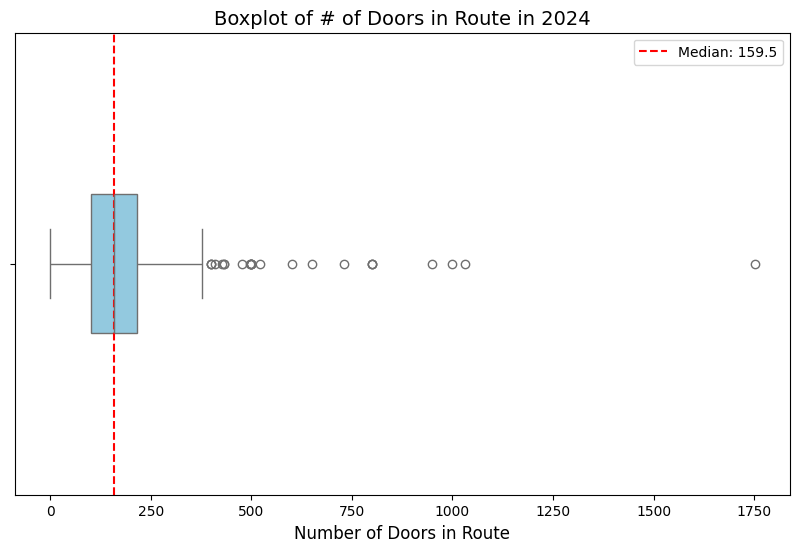

In [ ]:
# # Check for outliers in '# of Doors in Route' in 2024 using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_2024['#_of_doors_in_route'], color='skyblue', width = 0.3)

# Add labels and title
plt.title('Boxplot of # of Doors in Route in 2024', fontsize=14)
plt.xlabel('Number of Doors in Route', fontsize=12)

# Add a line at the median for emphasis
median = data_2024['#_of_doors_in_route'].median()
plt.axvline(median, color='red', linestyle='--', label=f'Median: {median}')


# Add a legend to explain the median line
plt.legend()

# Show the plot
plt.show()

The above boxplot shows there are outliers in the number of doors in route in 2024





/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


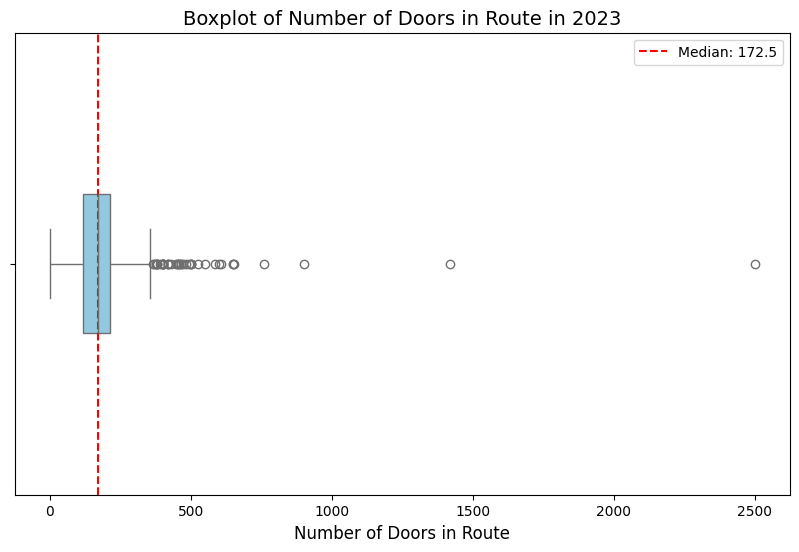

In [ ]:
# # Check for outliers in '# of Doors in Route' in 2023 using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_2023['Doors in Route'], color='skyblue', width = 0.3)

# Add labels and title
plt.title('Boxplot of Number of Doors in Route in 2023', fontsize=14)
plt.xlabel('Number of Doors in Route', fontsize=12)

# Add a line at the median for emphasis
median = data_2023['Doors in Route'].median()
plt.axvline(median, color='red', linestyle='--', label=f'Median: {median}')


# Add a legend to explain the median line
plt.legend()

# Show the plot
plt.show()


The above boxplot shows there are outliers in the number of doors in route in 2023

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


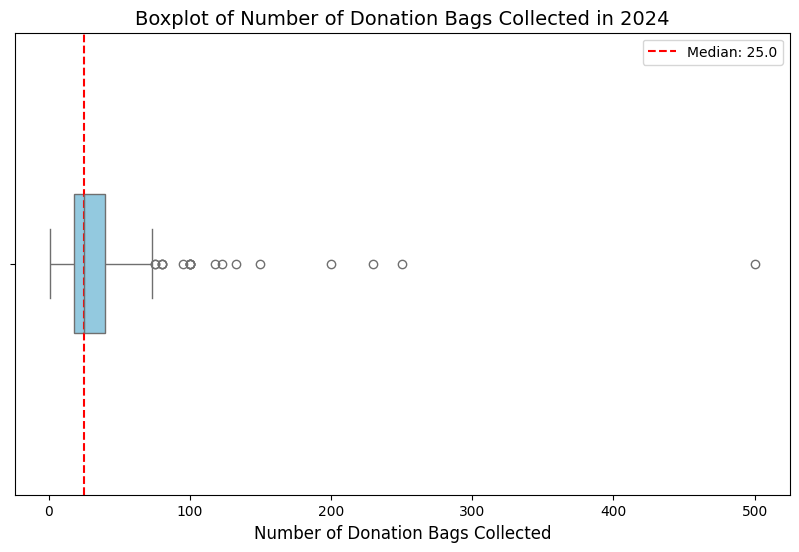

In [ ]:
# Check for outliers in '# of Donation Bags Collected' in 2024 using a boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(x=data_2024['#_of_donation_bags_collected'], color='skyblue', width = 0.3)

# Add labels and title
plt.title('Boxplot of Number of Donation Bags Collected in 2024', fontsize=14)
plt.xlabel('Number of Donation Bags Collected', fontsize=12)

# Add a line at the median for emphasis
median = data_2024['#_of_donation_bags_collected'].median()
plt.axvline(median, color='red', linestyle='--', label=f'Median: {median}')


# Add a legend to explain the median line
plt.legend()

# Show the plot
plt.show()


The above plot shows there are outliers in the number of donation bags collected in 2024


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


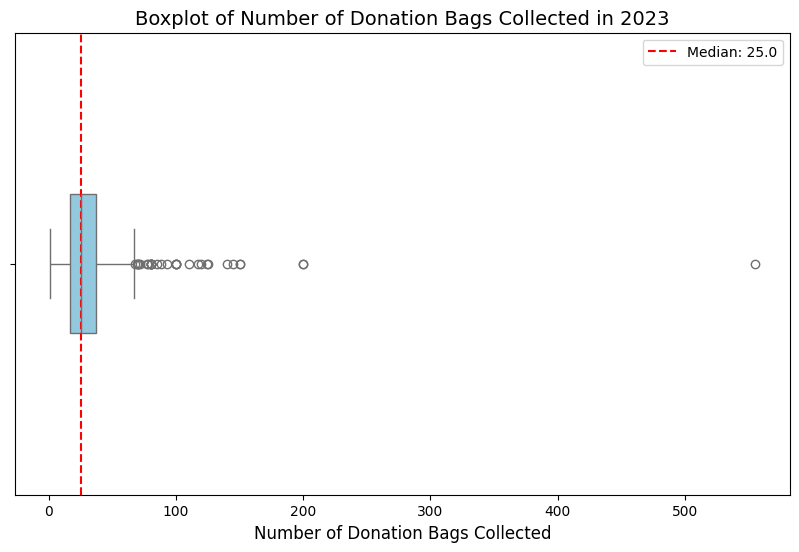

In [ ]:
# Check for outliers in 'Donation Bags Collecte' in 2023 using a boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(x=data_2023['Donation Bags Collected'], color='skyblue', width = 0.3)

# Add labels and title
plt.title('Boxplot of Number of Donation Bags Collected in 2023', fontsize=14)
plt.xlabel('Number of Donation Bags Collected', fontsize=12)

# Add a line at the median for emphasis
median = data_2023['Donation Bags Collected'].median()
plt.axvline(median, color='red', linestyle='--', label=f'Median: {median}')


# Add a legend to explain the median line
plt.legend()

# Show the plot
plt.show()

The above plot shows there are outliers in the number of donation bags collected in 2023

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


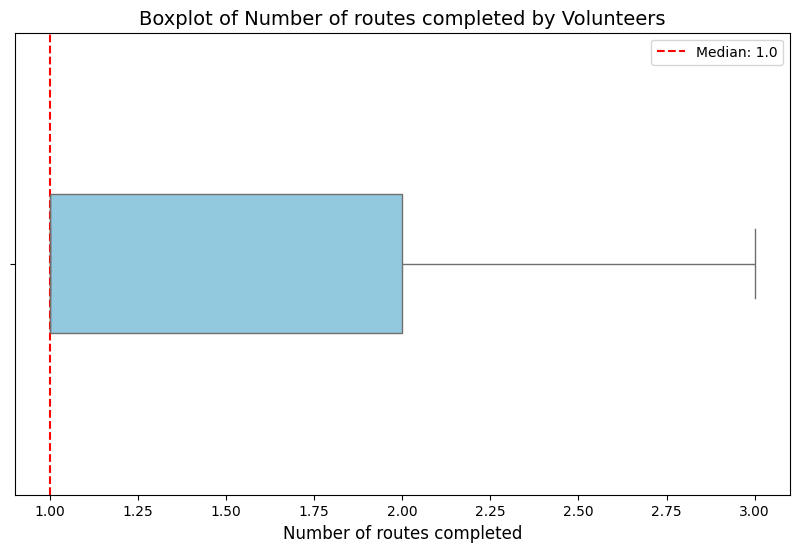

In [ ]:
# Check for outliers in 'number of routes completed'in 2024 using a boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(x=data_2024['Number of routes completed'], color='skyblue', width = 0.3)

# Add labels and title
plt.title('Boxplot of Number of routes completed by Volunteers', fontsize=14)
plt.xlabel('Number of routes completed', fontsize=12)

# Add a line at the median for emphasis
median = data_2024['Number of routes completed'].median()
plt.axvline(median, color='red', linestyle='--', label=f'Median: {median}')




# Add a legend to explain the median line
plt.legend()

# Show the plot
plt.show()


The above plot shows that there are no outliers in the number of routes completed, with the maximum route recorded set to 3. Although in the original dataset we observe the responses 'above 3' but there was no way to capture the exact number once it was beyond 3 routes

In [ ]:
data_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           454 non-null    object 
 1   Location                       454 non-null    object 
 2   Stake                          454 non-null    object 
 3   # of Adult Volunteers          454 non-null    int64  
 4   # of Youth Volunteers          454 non-null    int64  
 5   Donation Bags Collected        454 non-null    int64  
 6   Time to Complete (min)         454 non-null    float64
 7   Completed More Than One Route  454 non-null    int64  
 8   Ward/Branch                    454 non-null    object 
 9   Routes Completed               454 non-null    int64  
 10  Doors in Route                 454 non-null    int64  
 11  Time Spent                     454 non-null    float64
 12  Total Volunteers               454 non-null    int

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


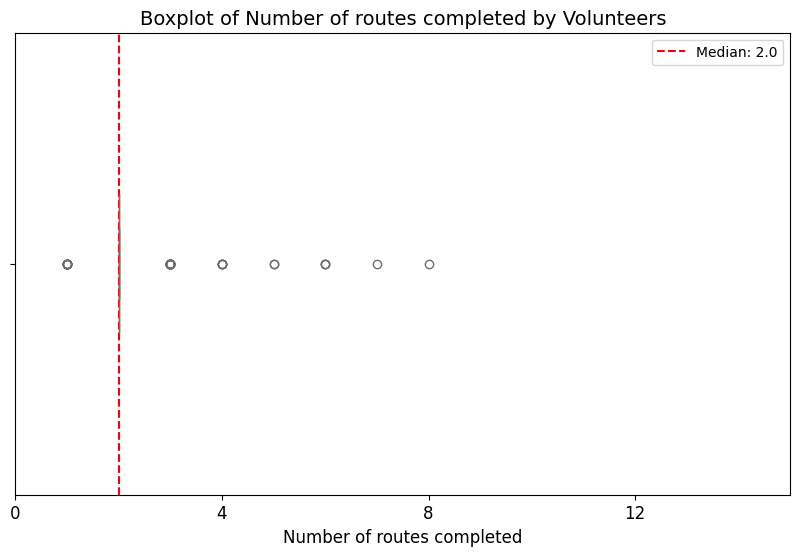

In [ ]:
# Check for outliers in 'Routes completed by Volunteers'in 2023 using a boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(x=data_2023['Routes Completed'], color='skyblue', width = 0.3)

# Add labels and title
plt.title('Boxplot of Number of routes completed by Volunteers', fontsize=14)
plt.xlabel('Number of routes completed', fontsize=12)

# Add a line at the median for emphasis
median = data_2023['Routes Completed'].median()
plt.axvline(median, color='red', linestyle='--', label=f'Median: {median}')

# Set custom x-axis scale with limits
plt.xlim(0, 15)  # Set x-axis limits (increased scale)
plt.xticks(ticks=range(0, 16, 4), fontsize=12)  # Set x-axis ticks to show more granular scale


# Add a legend to explain the median line
plt.legend()

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


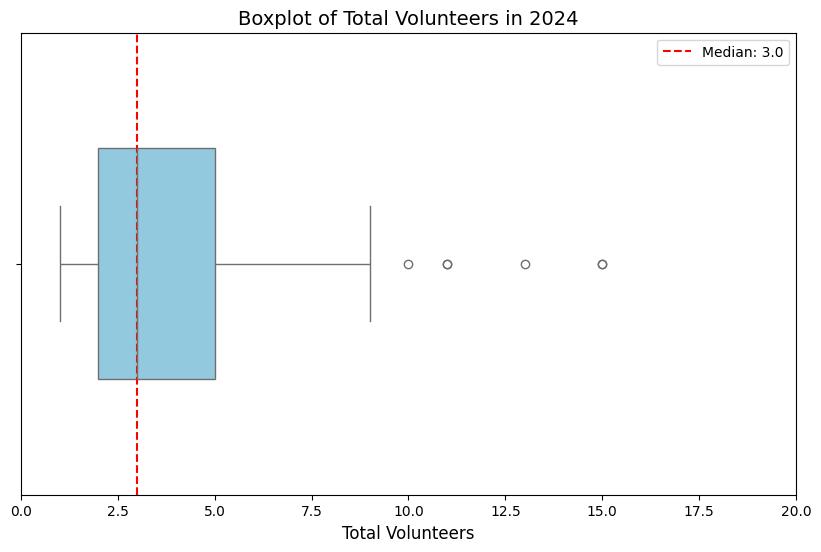

In [ ]:

# Check for outliers in 'Total Volunteers' in 2024 using a boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(x=data_2024['Total Volunteers'], color='skyblue', width = 0.5)

# Add labels and title
plt.title('Boxplot of Total Volunteers in 2024', fontsize=14)
plt.xlabel('Total Volunteers', fontsize=12)

# Add a line at the median for emphasis
median = data_2024['Total Volunteers'].median()
plt.axvline(median, color='red', linestyle='--', label=f'Median: {median}')

# Set the x-axis limits (adjust the min and max values as needed)
plt.xlim(0, 20)  # Change 0 and 100 to the desired range for your x-axis scale

# Add a legend to explain the median line
plt.legend()

# Show the plot
plt.show()

This shows there are outliers in the total number of volunteers assigned to routes

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


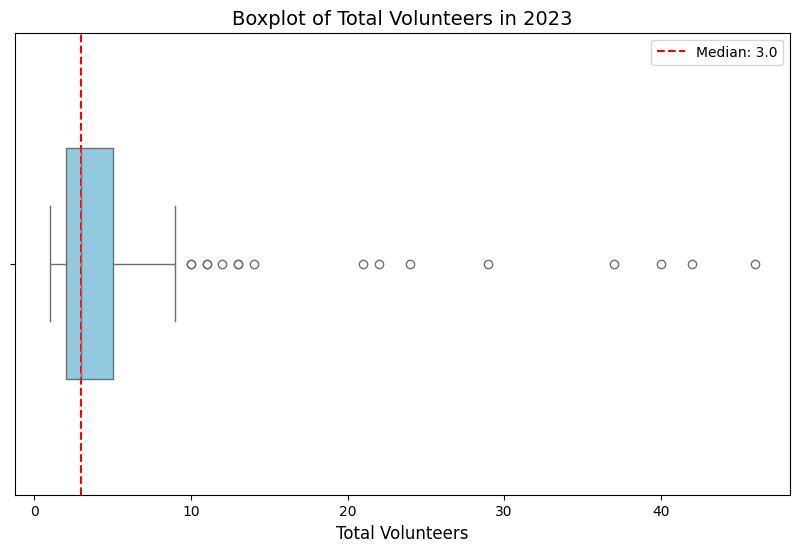

In [ ]:
# Check for outliers in 'Total Volunteers' in 2023 using a boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(x=data_2023['Total Volunteers'], color='skyblue', width = 0.5)

# Add labels and title
plt.title('Boxplot of Total Volunteers in 2023', fontsize=14)
plt.xlabel('Total Volunteers', fontsize=12)

# Add a line at the median for emphasis
median = data_2023['Total Volunteers'].median()
plt.axvline(median, color='red', linestyle='--', label=f'Median: {median}')


# Add a legend to explain the median line
plt.legend()

# Show the plot
plt.show()

This shows there are outliers in the total number of volunteers assigned to routes




**Now let's  handle the outliers in 2024 data**

First we make a copy of the cleaned dataset

In [ ]:
data_2024_clean = data_2024.copy()

We check for correlations in the dataset to ensure we don't remove outliers that are important to our dataset

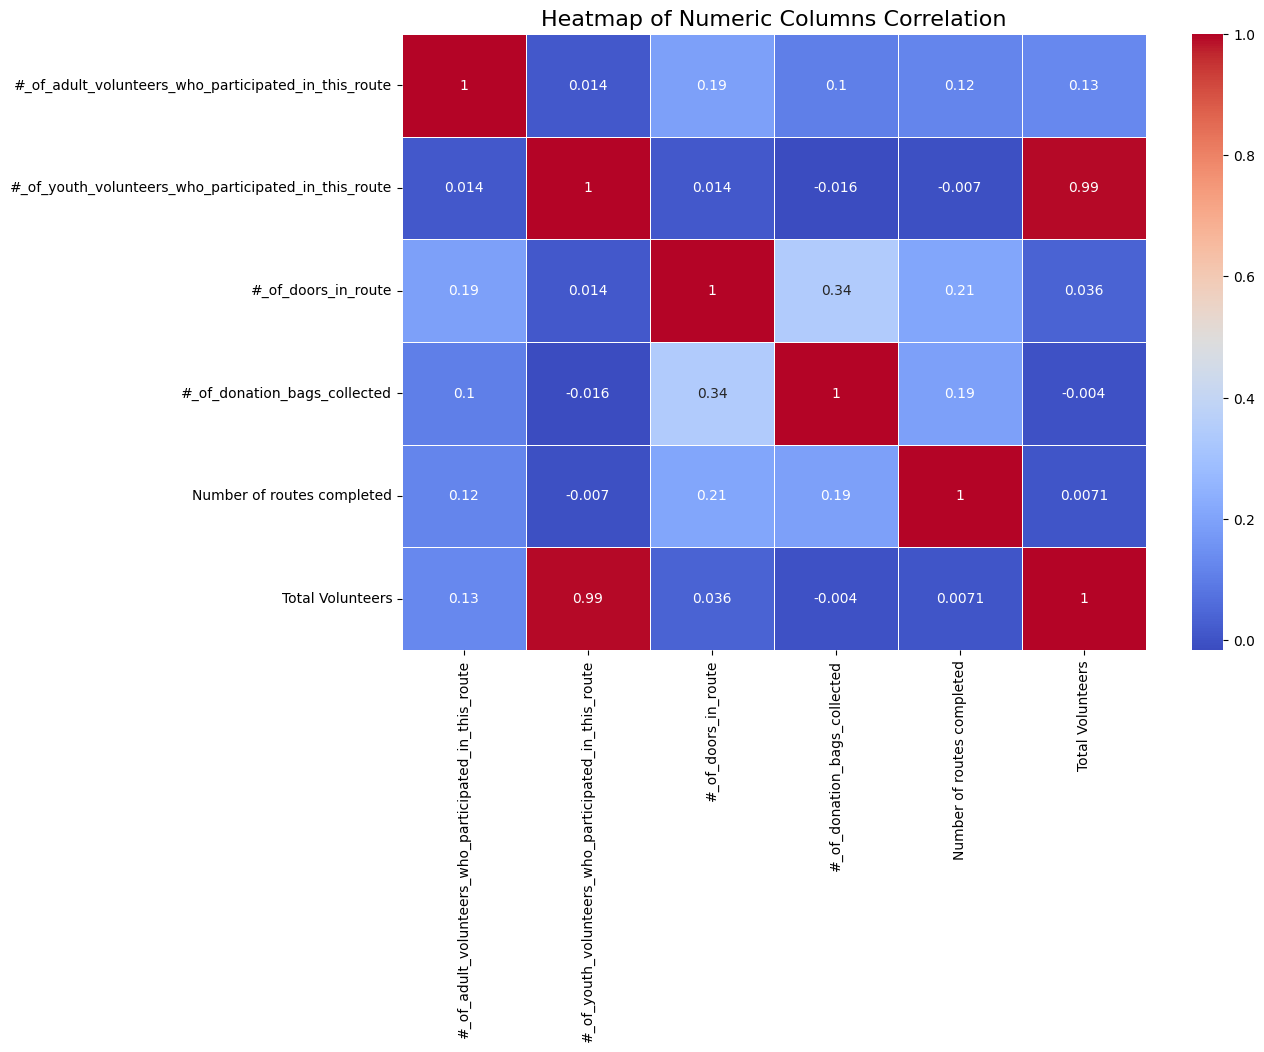

In [ ]:
# create a heatmap to check for correlations in the 2024 dataset

# Filter numeric columns from the dataframe
numeric_data = data_2024_clean.select_dtypes(include=['float64', 'int64'])

# Set figure size for better visibility
plt.figure(figsize=(12, 8))

# Create a heatmap for the numeric columns
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

# Add a title
plt.title('Heatmap of Numeric Columns Correlation', fontsize=16)

# Show the plot
plt.show()

From the heatmap we do not observe visible correlations that could account for outliers among the columns we have checked for outliers. For instance, the number of doors in route does not correlate with the number of donation bags collected. As a result, we proceed to remove outliers from the dataset. The only features that correlate are the number of youth volunteers vs the total number of volunteers. Because the number of youth feature is a subset of the total volunteer features we proceed with handling the outliers.

In [ ]:
# handling outliers in number of Doors in Route
Q1 = data_2024_clean['#_of_doors_in_route'].quantile(0.25)
Q3 = data_2024_clean['#_of_doors_in_route'].quantile(0.75)
IQR = Q3 - Q1

# Removing the outliers
data_2024_clean = data_2024_clean[~((data_2024_clean['#_of_doors_in_route'] < (Q1 - 1.5 * IQR)) | (data_2024_clean['#_of_doors_in_route'] > (Q3 + 1.5 * IQR)))]


In [ ]:
data_2024_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421 entries, 2 to 447
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   date                                                  421 non-null    datetime64[ns]
 1   drop_off_location                                     421 non-null    object        
 2   stake                                                 421 non-null    object        
 3   route_number/name                                     421 non-null    category      
 4   time_spent_collecting_donations                       421 non-null    category      
 5   #_of_adult_volunteers_who_participated_in_this_route  421 non-null    int64         
 6   #_of_youth_volunteers_who_participated_in_this_route  421 non-null    int64         
 7   #_of_doors_in_route                                   421 non-null    int64         


In [ ]:
# handling outliers in the # of Donation Bags Collected
Q1 = data_2024_clean['#_of_donation_bags_collected'].quantile(0.25)
Q3 = data_2024_clean['#_of_donation_bags_collected'].quantile(0.75)
IQR = Q3 - Q1

# Removing the outliers
data_2024_clean = data_2024_clean[~((data_2024_clean['#_of_donation_bags_collected'] < (Q1 - 1.5 * IQR)) | (data_2024_clean['#_of_donation_bags_collected'] > (Q3 + 1.5 * IQR)))]


In [ ]:
data_2024_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 2 to 447
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   date                                                  404 non-null    datetime64[ns]
 1   drop_off_location                                     404 non-null    object        
 2   stake                                                 404 non-null    object        
 3   route_number/name                                     404 non-null    category      
 4   time_spent_collecting_donations                       404 non-null    category      
 5   #_of_adult_volunteers_who_participated_in_this_route  404 non-null    int64         
 6   #_of_youth_volunteers_who_participated_in_this_route  404 non-null    int64         
 7   #_of_doors_in_route                                   404 non-null    int64         


In [ ]:
# handling outliers in the Total Volunteers
Q1 = data_2024_clean['Total Volunteers'].quantile(0.25)
Q3 = data_2024_clean['Total Volunteers'].quantile(0.75)
IQR = Q3 - Q1

# Removing the outliers
data_2024_clean = data_2024_clean[~((data_2024_clean['Total Volunteers'] < (Q1 - 1.5 * IQR)) | (data_2024_clean['Total Volunteers'] > (Q3 + 1.5 * IQR)))]


In [ ]:
data_2024_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 2 to 447
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   date                                                  400 non-null    datetime64[ns]
 1   drop_off_location                                     400 non-null    object        
 2   stake                                                 400 non-null    object        
 3   route_number/name                                     400 non-null    category      
 4   time_spent_collecting_donations                       400 non-null    category      
 5   #_of_adult_volunteers_who_participated_in_this_route  400 non-null    int64         
 6   #_of_youth_volunteers_who_participated_in_this_route  400 non-null    int64         
 7   #_of_doors_in_route                                   400 non-null    int64         


**Now let's handle the outliers in 2023 data**


In [ ]:
data_clean_2023 = data_2023.copy()

First we check for correlations

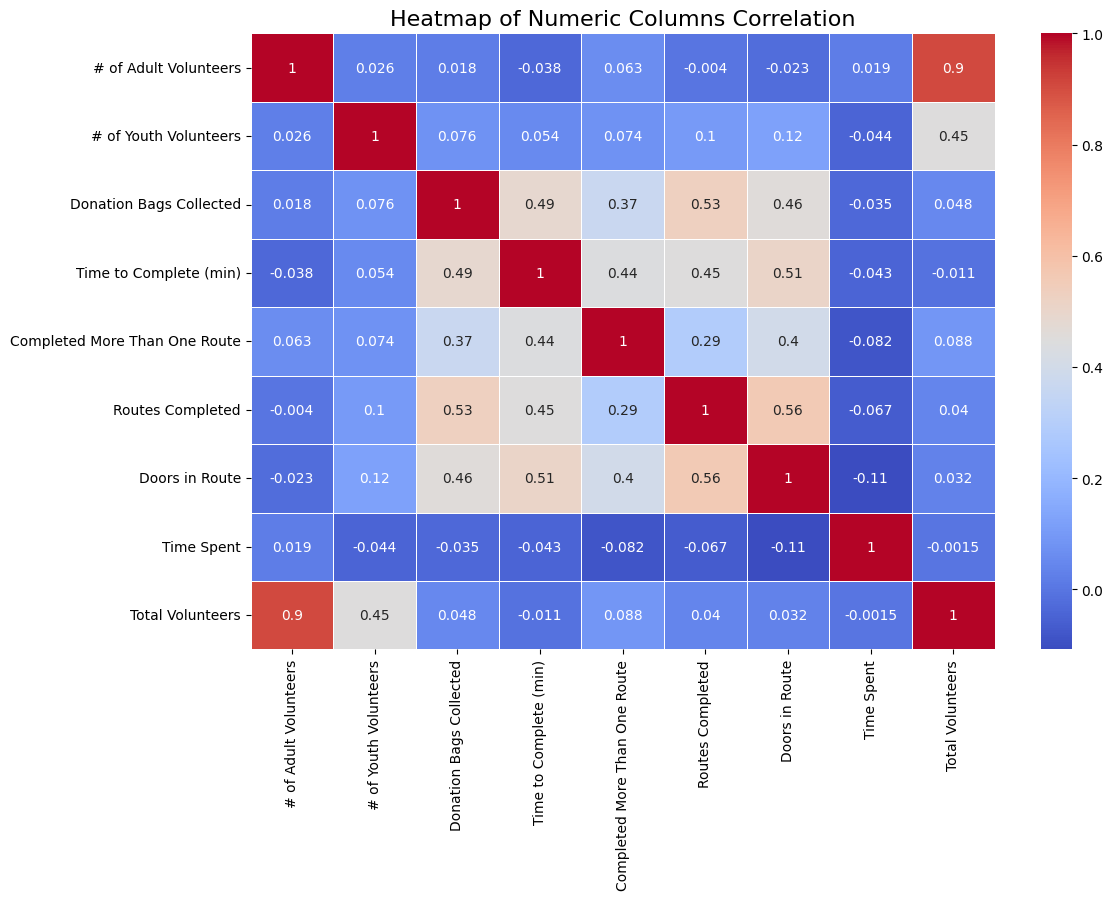

In [ ]:
# create a heatmap to check for correlations in the 2024 dataset

# Filter numeric columns from the dataframe
numeric_data = data_clean_2023.select_dtypes(include=['float64', 'int64'])

# Set figure size for better visibility
plt.figure(figsize=(12, 8))

# Create a heatmap for the numeric columns
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

# Add a title
plt.title('Heatmap of Numeric Columns Correlation', fontsize=16)

# Show the plot
plt.show()

As observed in 2024, we do not observe visible correlations that could account for outliers among the columns we have checked for outliers in the 2023 dataset.

In [ ]:
# handling outliers in number of Doors in Route
Q1 = data_clean_2023['Doors in Route'].quantile(0.25)
Q3 = data_clean_2023['Doors in Route'].quantile(0.75)
IQR = Q3 - Q1

# Removing the outliers
data_clean_2023 = data_clean_2023[~((data_clean_2023['Doors in Route'] < (Q1 - 1.5 * IQR)) | (data_clean_2023['Doors in Route'] > (Q3 + 1.5 * IQR)))]

In [ ]:
# handling outliers in the Donation Bags Collected
Q1 = data_clean_2023['Donation Bags Collected'].quantile(0.25)
Q3 = data_clean_2023['Donation Bags Collected'].quantile(0.75)
IQR = Q3 - Q1

# Removing the outliers
data_clean_2023 = data_clean_2023[~((data_clean_2023['Donation Bags Collected'] < (Q1 - 1.5 * IQR)) | (data_clean_2023['Donation Bags Collected'] > (Q3 + 1.5 * IQR)))]

In [ ]:
data_clean_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 0 to 453
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           398 non-null    object 
 1   Location                       398 non-null    object 
 2   Stake                          398 non-null    object 
 3   # of Adult Volunteers          398 non-null    int64  
 4   # of Youth Volunteers          398 non-null    int64  
 5   Donation Bags Collected        398 non-null    int64  
 6   Time to Complete (min)         398 non-null    float64
 7   Completed More Than One Route  398 non-null    int64  
 8   Ward/Branch                    398 non-null    object 
 9   Routes Completed               398 non-null    int64  
 10  Doors in Route                 398 non-null    int64  
 11  Time Spent                     398 non-null    float64
 12  Total Volunteers               398 non-null    int64  


In [ ]:
# handling outliers in the Total Volunteers
Q1 = data_clean_2023['Total Volunteers'].quantile(0.25)
Q3 = data_clean_2023['Total Volunteers'].quantile(0.75)
IQR = Q3 - Q1

# Removing the outliers
data_clean_2023 = data_clean_2023[~((data_clean_2023['Total Volunteers'] < (Q1 - 1.5 * IQR)) | (data_clean_2023['Total Volunteers'] > (Q3 + 1.5 * IQR)))]


In [ ]:
data_clean_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383 entries, 0 to 453
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           383 non-null    object 
 1   Location                       383 non-null    object 
 2   Stake                          383 non-null    object 
 3   # of Adult Volunteers          383 non-null    int64  
 4   # of Youth Volunteers          383 non-null    int64  
 5   Donation Bags Collected        383 non-null    int64  
 6   Time to Complete (min)         383 non-null    float64
 7   Completed More Than One Route  383 non-null    int64  
 8   Ward/Branch                    383 non-null    object 
 9   Routes Completed               383 non-null    int64  
 10  Doors in Route                 383 non-null    int64  
 11  Time Spent                     383 non-null    float64
 12  Total Volunteers               383 non-null    int64  


**Next, we create visualizations for the initially cleaned data set that contains the outliers**

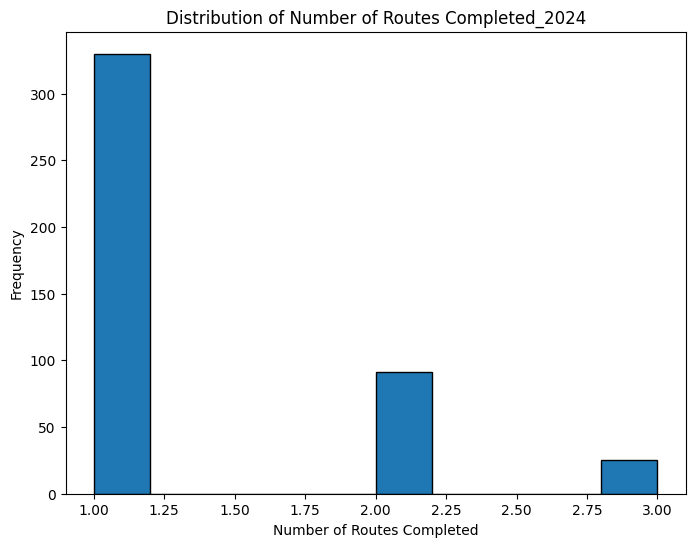

In [ ]:
# Create a histogram for 'Number of routes completed in 2024'
plt.figure(figsize=(8, 6))
plt.hist(data_2024['Number of routes completed'], bins=10, edgecolor='black')
plt.xlabel('Number of Routes Completed')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Routes Completed_2024')
plt.show()

2023

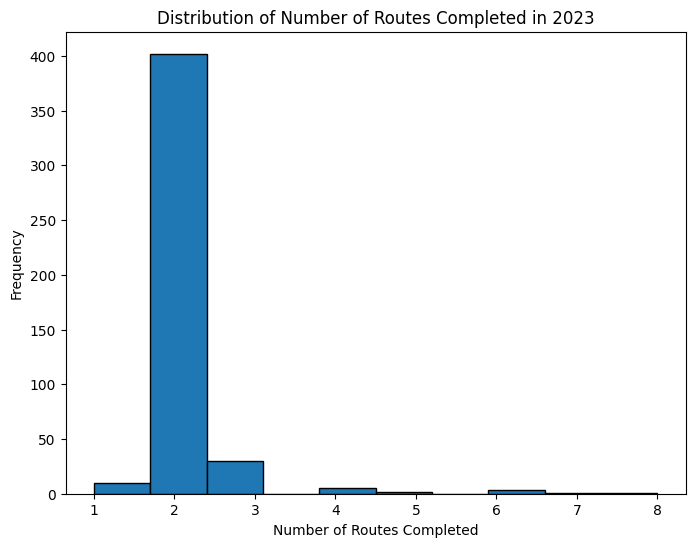

In [ ]:
# Create a histogram for 'Number of routes completed' in 2023
plt.figure(figsize=(8, 6))
plt.hist(data_2023['Routes Completed'], bins=10, edgecolor='black')
plt.xlabel('Number of Routes Completed')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Routes Completed in 2023')
plt.show()

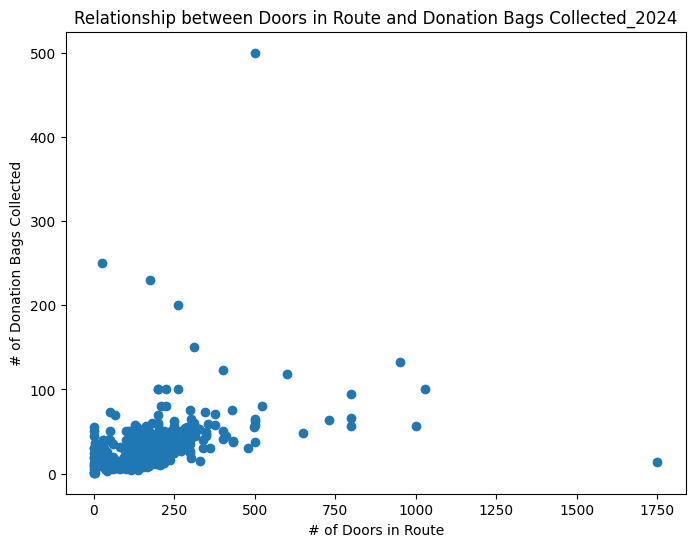

In [ ]:
# Create a scatter plot for '# of Donation Bags Collected' vs. '# of Doors in Route in 2024'
plt.figure(figsize=(8, 6))
plt.scatter(data_2024['#_of_doors_in_route'], data_2024['#_of_donation_bags_collected'])
plt.xlabel('# of Doors in Route')
plt.ylabel('# of Donation Bags Collected')
plt.title('Relationship between Doors in Route and Donation Bags Collected_2024')
plt.show()

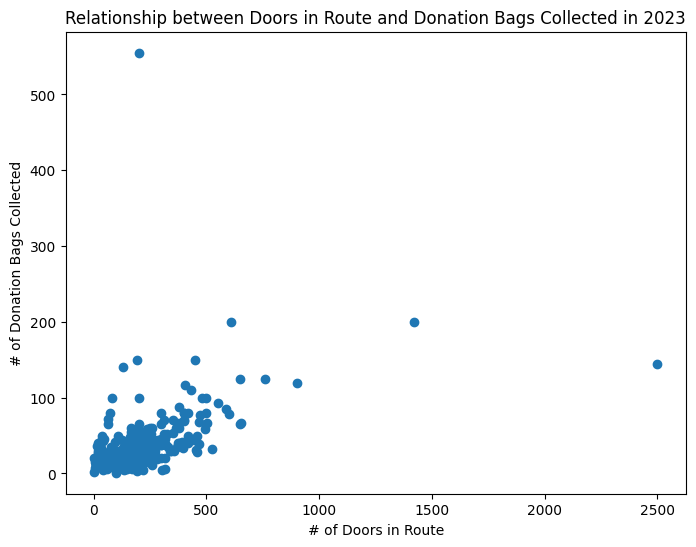

In [ ]:
# Create a scatter plot for 'Donation Bags Collected' vs. 'Doors in Route in 2023'
plt.figure(figsize=(8, 6))
plt.scatter(data_2023['Doors in Route'], data_2023['Donation Bags Collected'])
plt.xlabel('# of Doors in Route')
plt.ylabel('# of Donation Bags Collected')
plt.title('Relationship between Doors in Route and Donation Bags Collected in 2023')
plt.show()

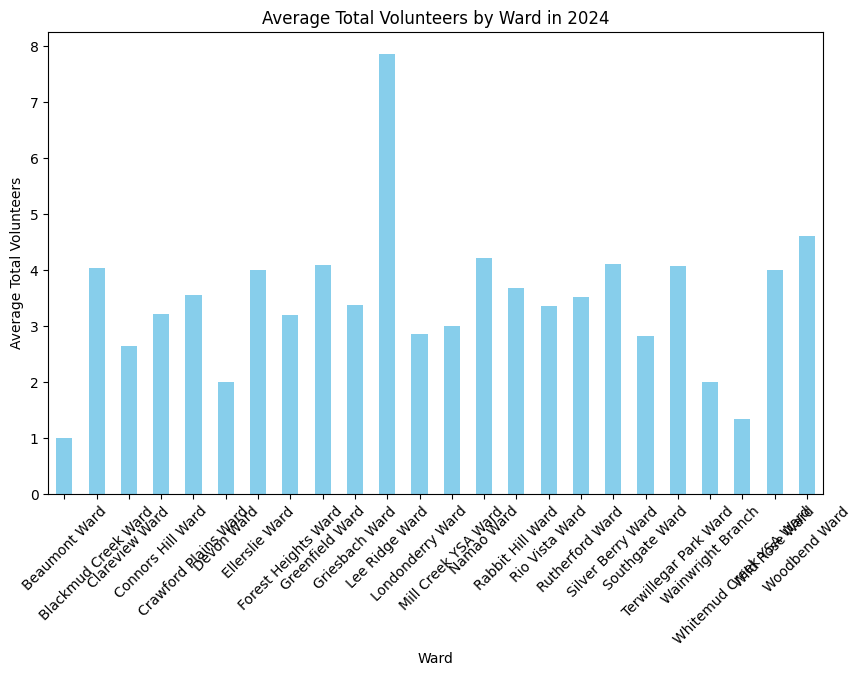

In [ ]:
# Create a bar chart for the average number of volunteers by ward in 2024
avg_volunteers_by_ward = data_2024.groupby('ward')['Total Volunteers'].mean()
plt.figure(figsize=(10, 6))
avg_volunteers_by_ward.plot(kind='bar', color='skyblue')
plt.xlabel('Ward')
plt.ylabel('Average Total Volunteers')
plt.title('Average Total Volunteers by Ward in 2024')
plt.xticks(rotation=45)
plt.show()

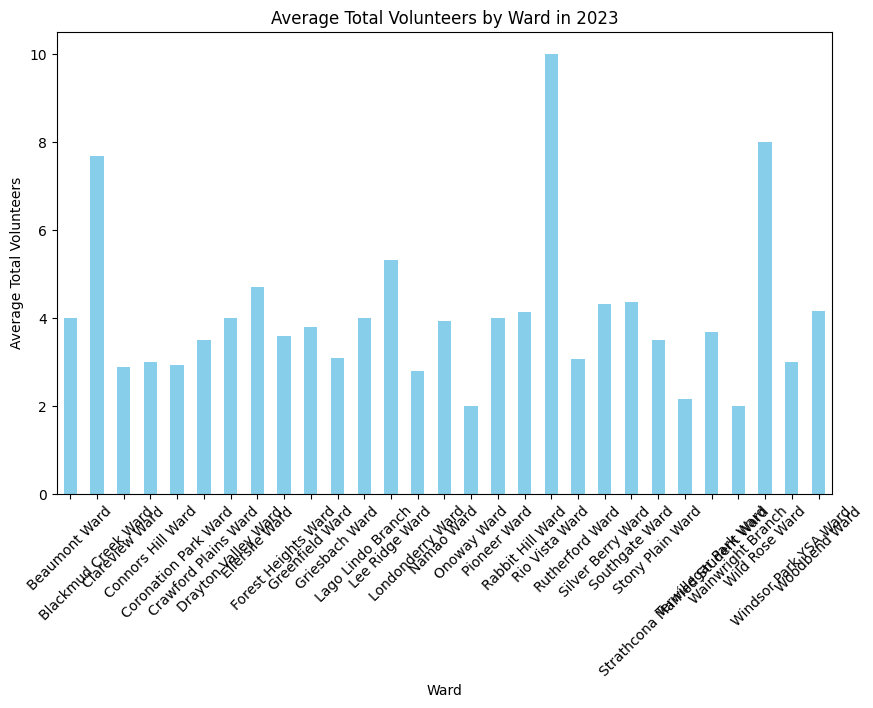

In [ ]:
# Creating a bar chart for the average number of volunteers by ward
avg_volunteers_by_ward = data_2023.groupby('Ward/Branch')['Total Volunteers'].mean()
plt.figure(figsize=(10, 6))
avg_volunteers_by_ward.plot(kind='bar', color='skyblue')
plt.xlabel('Ward')
plt.ylabel('Average Total Volunteers')
plt.title('Average Total Volunteers by Ward in 2023')
plt.xticks(rotation=45)
plt.show()

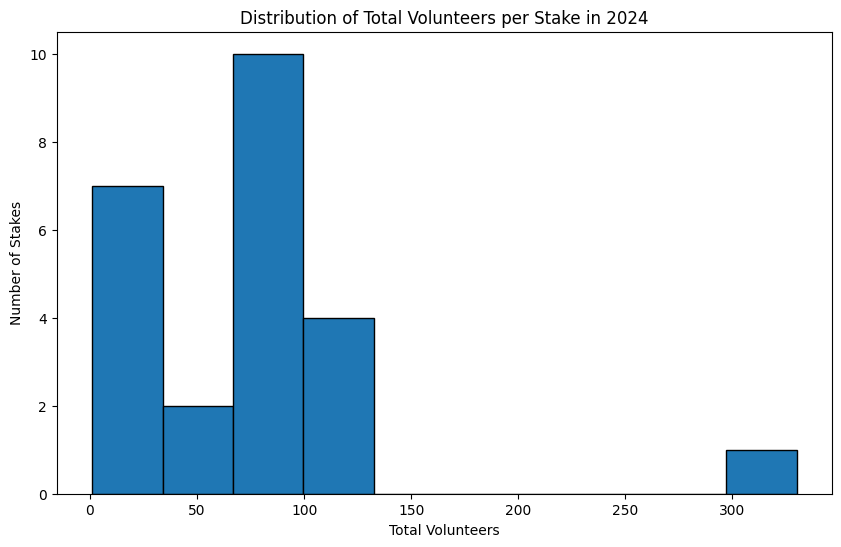

In [ ]:
# Calculate the total number of volunteers per stake
total_volunteers_per_stake = data_2024.groupby('ward')['Total Volunteers'].sum()

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(total_volunteers_per_stake, bins=10, edgecolor='black')
plt.xlabel('Total Volunteers')
plt.ylabel('Number of Stakes')
plt.title('Distribution of Total Volunteers per Stake in 2024')
plt.show()

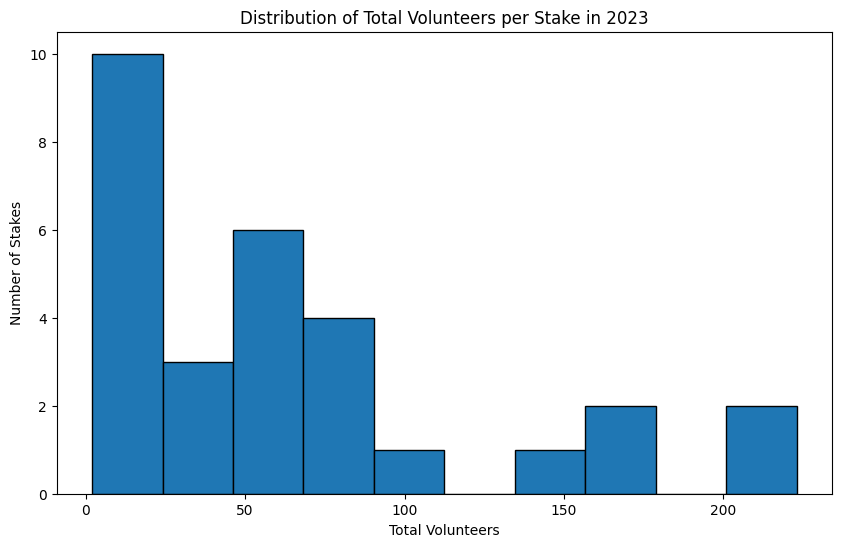

In [ ]:
# Calculate the total number of volunteers per stake in 2023
total_volunteers_per_stake_2023 = data_2023.groupby('Ward/Branch')['Total Volunteers'].sum()

# Create the histogram for 2023 data
plt.figure(figsize=(10, 6))
plt.hist(total_volunteers_per_stake_2023, bins=10, edgecolor='black')
plt.xlabel('Total Volunteers')
plt.ylabel('Number of Stakes')
plt.title('Distribution of Total Volunteers per Stake in 2023')
plt.show()

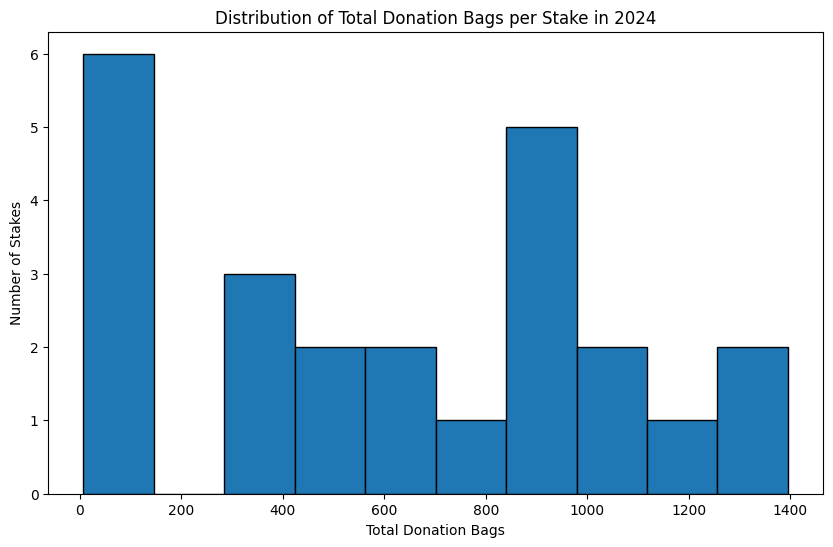

In [ ]:
# Calculate total donation bags per stake
total_donation_bags_per_stake = data_2024.groupby('ward')['#_of_donation_bags_collected'].sum()

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(total_donation_bags_per_stake, bins=10, edgecolor='black')
plt.xlabel('Total Donation Bags')
plt.ylabel('Number of Stakes')
plt.title('Distribution of Total Donation Bags per Stake in 2024')
plt.show()

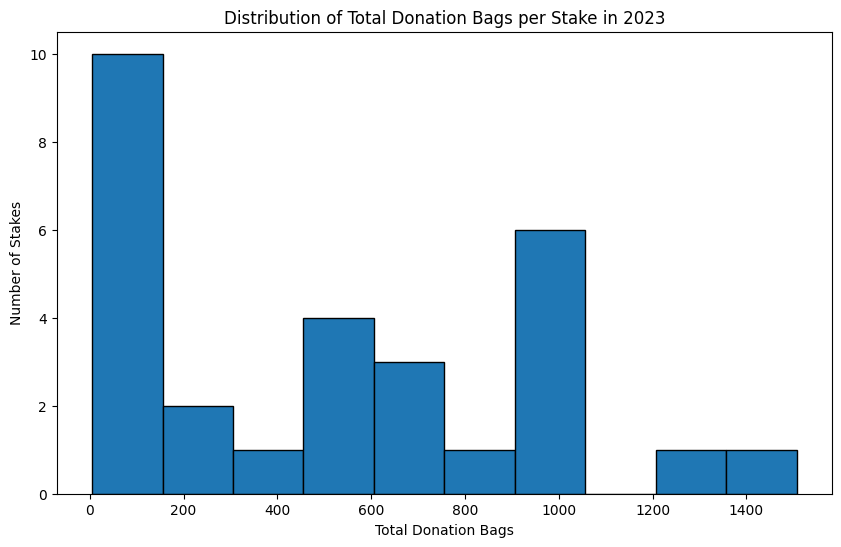

In [ ]:
# Calculate total donation bags per stake in 2023
total_donation_bags_per_stake_2023 = data_2023.groupby('Ward/Branch')['Donation Bags Collected'].sum()

# Create the histogram for 2023 data
plt.figure(figsize=(10, 6))
plt.hist(total_donation_bags_per_stake_2023, bins=10, edgecolor='black')
plt.xlabel('Total Donation Bags')
plt.ylabel('Number of Stakes')
plt.title('Distribution of Total Donation Bags per Stake in 2023')
plt.show()

**We now create visualizations for the copy of the dataset that does not contain outliers in both the 2023 and 2024 datasets**

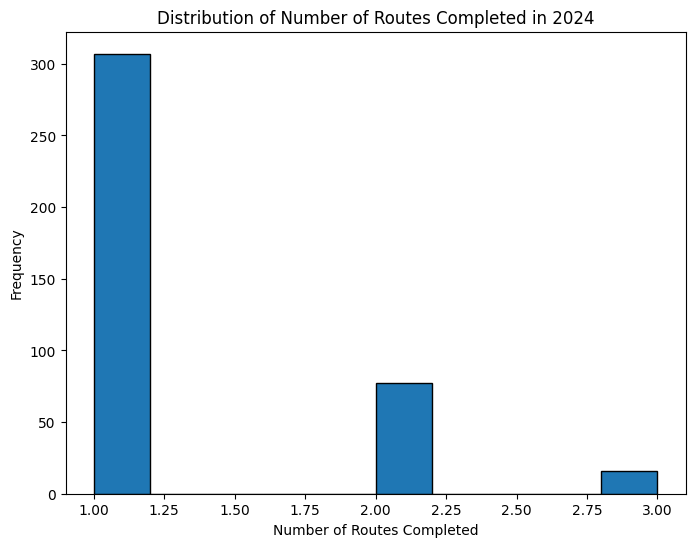

In [ ]:
# Create a histogram for 'Number of routes completed'
plt.figure(figsize=(8, 6))
plt.hist(data_2024_clean['Number of routes completed'], bins=10, edgecolor='black')
plt.xlabel('Number of Routes Completed')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Routes Completed in 2024')
plt.show()

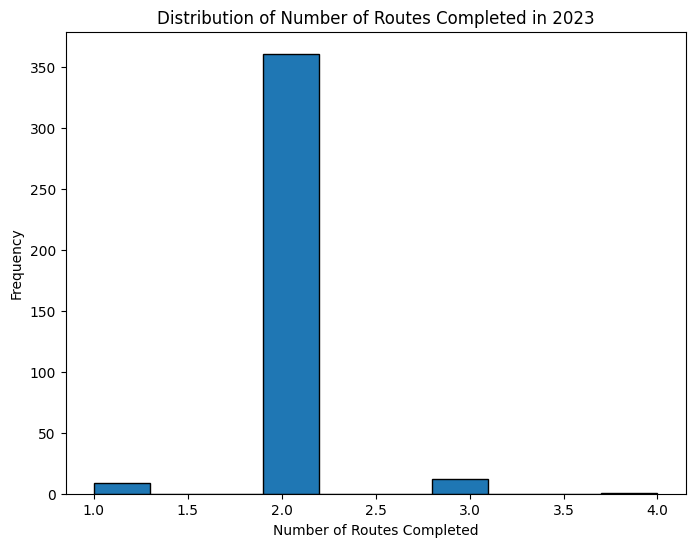

In [ ]:
# Create a histogram for 'Number of routes completed'
plt.figure(figsize=(8, 6))
plt.hist(data_clean_2023['Routes Completed'], bins=10, edgecolor='black')
plt.xlabel('Number of Routes Completed')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Routes Completed in 2023')
plt.show()

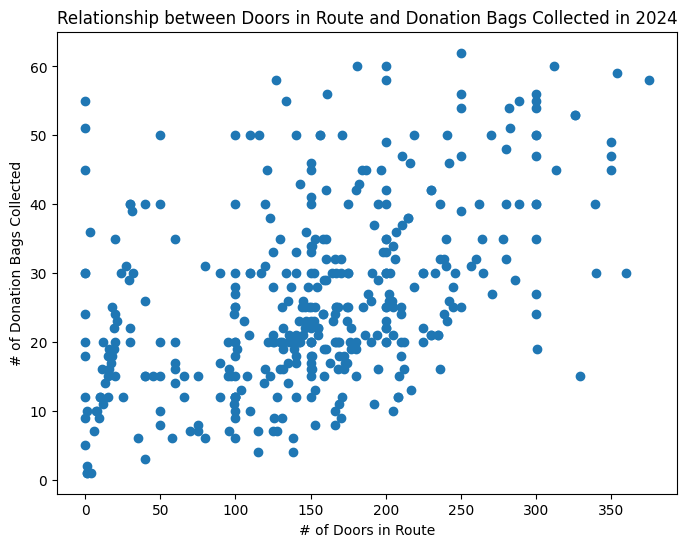

In [ ]:
# Create a scatter plot for '# of Donation Bags Collected' vs. '# of Doors in Route'
plt.figure(figsize=(8, 6))
plt.scatter(data_2024_clean['#_of_doors_in_route'], data_2024_clean['#_of_donation_bags_collected'])
plt.xlabel('# of Doors in Route')
plt.ylabel('# of Donation Bags Collected')
plt.title('Relationship between Doors in Route and Donation Bags Collected in 2024')
plt.show()

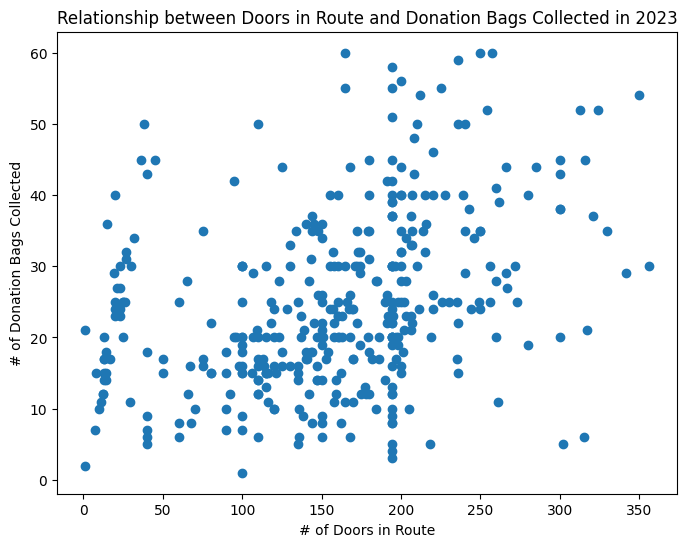

In [ ]:
# Create a scatter plot for '# of Donation Bags Collected' vs. '# of Doors in Route in 2023'
plt.figure(figsize=(8, 6))
plt.scatter(data_clean_2023['Doors in Route'], data_clean_2023['Donation Bags Collected'])
plt.xlabel('# of Doors in Route')
plt.ylabel('# of Donation Bags Collected')
plt.title('Relationship between Doors in Route and Donation Bags Collected in 2023')
plt.show()

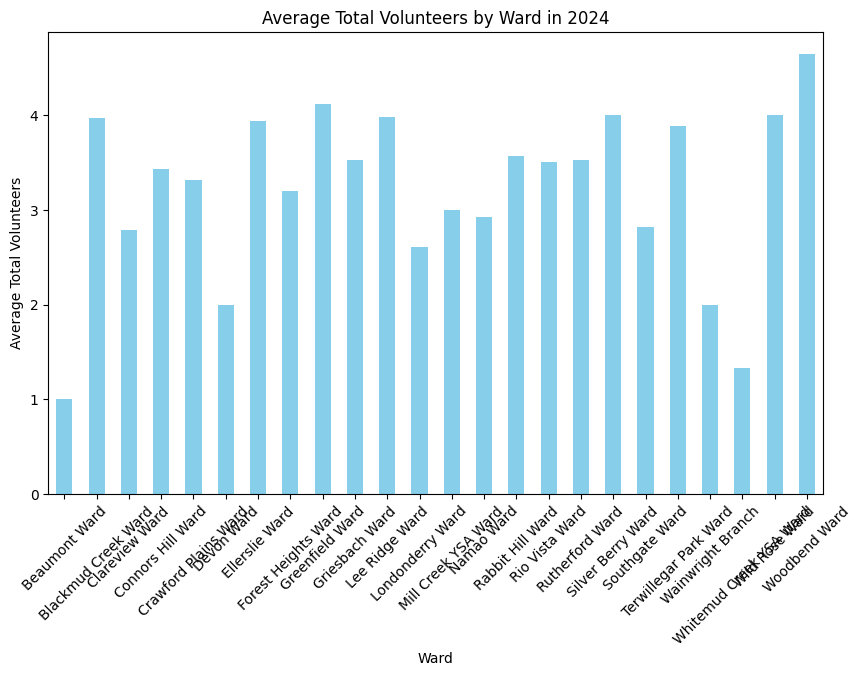

In [ ]:

# Create a bar chart for the average number of volunteers by ward in 2024
avg_volunteers_by_ward = data_2024_clean.groupby('ward')['Total Volunteers'].mean()
plt.figure(figsize=(10, 6))
avg_volunteers_by_ward.plot(kind='bar', color='skyblue')
plt.xlabel('Ward')
plt.ylabel('Average Total Volunteers')
plt.title('Average Total Volunteers by Ward in 2024')
plt.xticks(rotation=45)
plt.show()

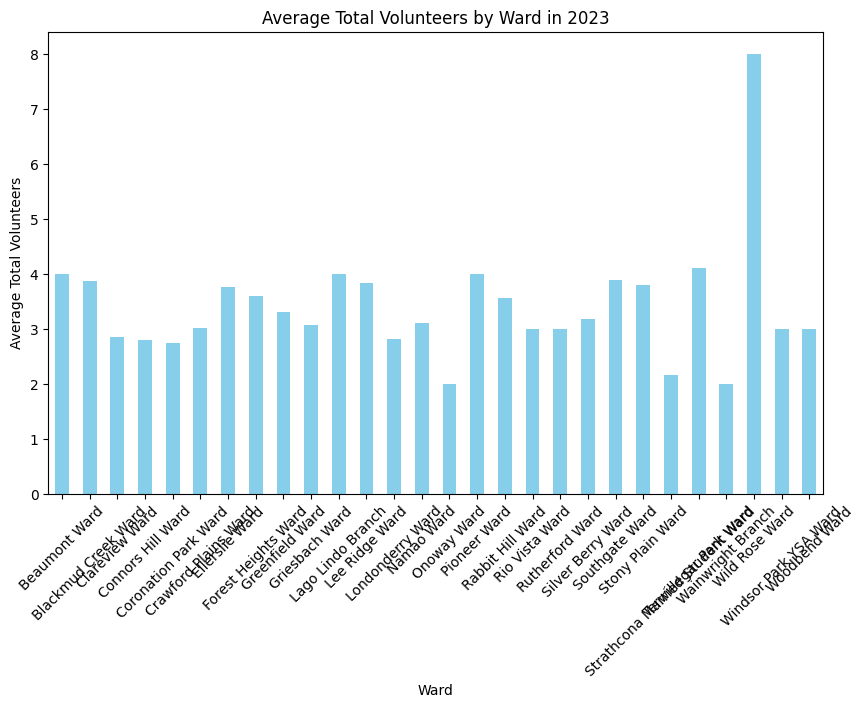

In [ ]:

#Create a bar chart for the average number of volunteers by ward in 2023
avg_volunteers_by_ward = data_clean_2023.groupby('Ward/Branch')['Total Volunteers'].mean()
plt.figure(figsize=(10, 6))
avg_volunteers_by_ward.plot(kind='bar', color='skyblue')
plt.xlabel('Ward')
plt.ylabel('Average Total Volunteers')
plt.title('Average Total Volunteers by Ward in 2023')
plt.xticks(rotation=45)
plt.show()

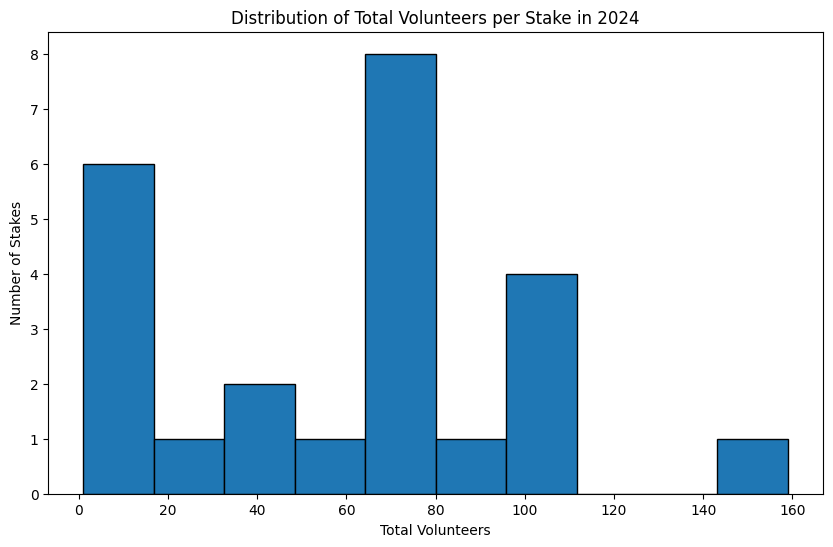

In [ ]:
# Calculate the total number of volunteers per stake in 2024
total_volunteers_per_stake = data_2024_clean.groupby('ward')['Total Volunteers'].sum()

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(total_volunteers_per_stake, bins=10, edgecolor='black')
plt.xlabel('Total Volunteers')
plt.ylabel('Number of Stakes')
plt.title('Distribution of Total Volunteers per Stake in 2024')
plt.show()

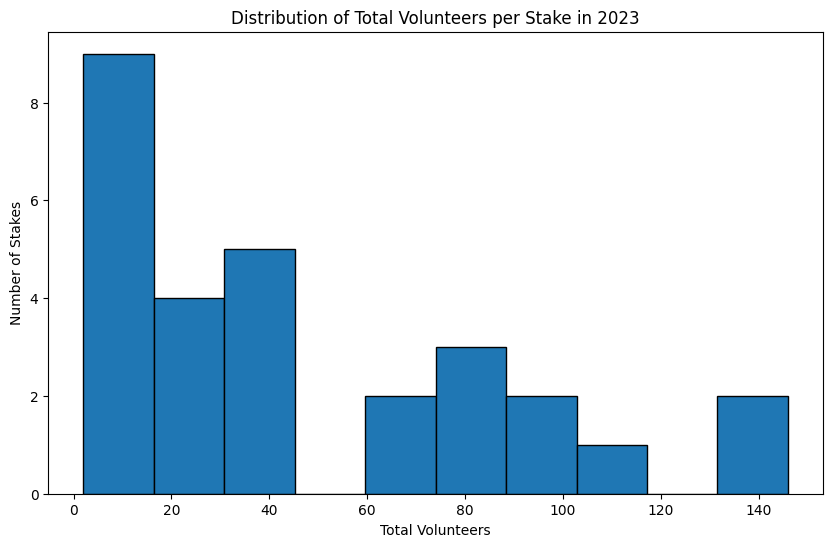

In [ ]:
# Calculate the total number of volunteers per stake in 2023
total_volunteers_per_stake = data_clean_2023.groupby('Ward/Branch')['Total Volunteers'].sum()

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(total_volunteers_per_stake, bins=10, edgecolor='black')
plt.xlabel('Total Volunteers')
plt.ylabel('Number of Stakes')
plt.title('Distribution of Total Volunteers per Stake in 2023')
plt.show()

Download files that contains no outliers

In [ ]:
data_2024_clean.to_csv('data_2024_clean_nooutliers.csv', index=False)

In [ ]:
data_clean_2023.to_csv('data_clean_2023_nooutliers.csv', index=False)

In [ ]:
data_clean_2023.describe()

,# of Adult Volunteers,# of Youth Volunteers,Donation Bags Collected,Time to Complete (min),Completed More Than One Route,Routes Completed,Doors in Route,Time Spent,Total Volunteers
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,1.966057,1.347258,24.647520,48.586162,0.258486,2.013055,156.253264,-25.411513,3.313316
std,0.838471,1.424188,12.248241,26.850305,0.438375,0.255488,74.032794,232.051180,1.525011
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-690.000000,1.000000
25%,1.500000,0.000000,16.000000,30.000000,0.000000,2.000000,110.000000,25.000000,2.000000
50%,2.000000,1.000000,23.000000,45.000000,0.000000,2.000000,162.000000,40.000000,3.000000
75%,2.000000,2.000000,32.000000,60.000000,1.000000,2.000000,200.000000,60.000000,4.000000
max,7.000000,7.000000,60.000000,245.000000,1.000000,4.000000,356.000000,754.000000,8.000000


In [ ]:
data_2024_clean.describe()

,date,#_of_adult_volunteers_who_participated_in_this_route,#_of_youth_volunteers_who_participated_in_this_route,#_of_doors_in_route,#_of_donation_bags_collected,Number of routes completed,Total Volunteers
count,400,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,2024-09-28 14:23:31.175000064,2.042500,1.457500,151.665000,26.385000,1.272500,3.500000
min,2024-09-28 10:01:37,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2024-09-28 11:26:30.750000128,2.000000,0.000000,100.000000,17.000000,1.000000,2.000000
50%,2024-09-28 11:53:49.500000,2.000000,1.000000,151.000000,24.000000,1.000000,3.000000
75%,2024-09-28 12:35:12,2.000000,2.000000,200.000000,34.250000,1.000000,5.000000
max,2024-10-01 08:13:07,6.000000,6.000000,375.000000,62.000000,3.000000,9.000000
std,NaN,0.878991,1.462375,83.335435,13.301658,0.528149,1.667919


FEATURE **ENGINEERING**

In [17]:
print(data_2023.head())

                  Date              Location              Stake  \
0  2023-09-23 10:36:10    Londonderry Chapel  Bonnie Doon Stake   
1  2023-09-23 10:36:52  Gateway Stake Centre      Gateway Stake   
2  2023-09-23 10:40:22  Gateway Stake Centre      Gateway Stake   
3  2023-09-23 10:41:08  Gateway Stake Centre      Gateway Stake   
4  2023-09-23 10:44:10    Londonderry Chapel  Bonnie Doon Stake   

   # of Adult Volunteers  # of Youth Volunteers  Donation Bags Collected  \
0                      1                      3                       14   
1                      3                      1                       18   
2                      2                      0                       20   
3                      2                      0                       20   
4                      1                      0                        2   

   Time to Complete (min)  Completed More Than One Route  \
0                    25.0                              0   
1                   

In [18]:
print(data_2024.head())

   ID        Start time   Completion time      Email  Name  \
0  23  9-25-24 16:56:05  9-25-24 16:57:23  anonymous   NaN   
1  24  9-27-24 14:43:27  9-27-24 14:49:42  anonymous   NaN   
2  25  9-28-24 10:01:37  9-28-24 10:05:20  anonymous   NaN   
3  26  9-28-24 10:31:19  9-28-24 10:34:00  anonymous   NaN   
4  27  9-28-24 10:33:28  9-28-24 10:36:55  anonymous   NaN   

  How did you receive the form? Email address          Drop Off Location  \
0                     In person            NaN           Bearspaw Chapel   
1                     via Email            NaN           Bearspaw Chapel   
2                     In person            NaN        Londonberry Chapel   
3                     In person            NaN     Gateway Stake Centre    
4                     In person            NaN  Bonnie Doon Stake Centre   

  Other Drop-off Locations              Stake  ...  \
0                      NaN    Riverbend Stake  ...   
1                      NaN      Gateway Stake  ...   
2       

The columns renamed are relevant to our analysis. Please add more as you deem necessary.

In [25]:
# Renaming columns in data_2023 to match data_2024
data_2023 = data_2023.rename(columns={
    'Doors in Route': '#_of_doors_in_route',
    'Donation Bags Collected': '#_of_donation_bags_collected',
    'Routes Completed': 'Number of routes completed',
    'Ward/Branch': 'ward',
    '# of Adult Volunteers': '#_of_adult_volunteers_who_participated_in_this_route',
    '# of Youth Volunteers': '#_of_youth_volunteers_who_participated_in_this_route',
    'Total Volunteers': 'Total Volunteers',

})



In [26]:
# Print the updated column names in 2023 for verification
print(data_2023.columns)


Index(['Date', 'Location', 'Stake',
       '#_of_adult_volunteers_who_participated_in_this_route',
       '#_of_youth_volunteers_who_participated_in_this_route',
       '#_of_donation_bags_collected', 'Time to Complete (min)',
       'Completed More Than One Route', 'ward', 'Number of routes completed',
       '#_of_doors_in_route', 'Time Spent'],
      dtype='object')


In [22]:
# Print the updated column names  in 2024 for verification
print(data_2024.columns)

Index(['ID', 'Start time', 'Completion time', 'Email', 'Name',
       'How did you receive the form?', 'Email address ', 'Drop Off Location',
       'Other Drop-off Locations', 'Stake', 'Bonnie Doon Stake',
       'Edmonton North Stake', 'Gateway Stake', 'Riverbend Stake',
       'Sherwood Park Stake', 'YSA Stake', 'Route Number/Name',
       'Time Spent Collecting Donations',
       '# of Adult Volunteers who participated in this route',
       '# of Youth Volunteers who participated in this route\n',
       '# of Doors in Route', '# of Donation Bags Collected',
       'Did you complete more than 1 route?',
       'How many routes did you complete?',
       'Additional Routes completed (2 routes)',
       'Additional routes completed (3 routes)',
       'Additional routes completed (3 routes)2',
       'Additional routes completed (More than 3 Routes)',
       'Additional routes completed (More than 3 Routes)2',
       'Additional routes completed (More than 3 Routes)3',
       'Comme